<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Running-different-algorithms" data-toc-modified-id="Running-different-algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Running different algorithms</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Gaussian-Naïve-Bayes" data-toc-modified-id="Gaussian-Naïve-Bayes-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gaussian Naïve Bayes</a></span></li><li><span><a href="#Multinomial-Naïve-Bayes" data-toc-modified-id="Multinomial-Naïve-Bayes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Multinomial Naïve Bayes</a></span></li><li><span><a href="#Bernoulli-Naïve-Bayes" data-toc-modified-id="Bernoulli-Naïve-Bayes-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Bernoulli Naïve Bayes</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Evaluation-of-models" data-toc-modified-id="Evaluation-of-models-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Evaluation of models</a></span></li><li><span><a href="#Multinomial-NB-removing-low-probabilities" data-toc-modified-id="Multinomial-NB-removing-low-probabilities-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Multinomial NB removing low probabilities</a></span></li></ul></li><li><span><a href="#Sentiment-Analysis-with-TextBlob" data-toc-modified-id="Sentiment-Analysis-with-TextBlob-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sentiment Analysis with TextBlob</a></span></li><li><span><a href="#Darden-Restaurants" data-toc-modified-id="Darden-Restaurants-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Darden Restaurants</a></span><ul class="toc-item"><li><span><a href="#Geolocation" data-toc-modified-id="Geolocation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Geolocation</a></span></li><li><span><a href="#Topics-and-sentiments-of-Darden-restaurants" data-toc-modified-id="Topics-and-sentiments-of-Darden-restaurants-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Topics and sentiments of Darden restaurants</a></span></li><li><span><a href="#Visualizaton" data-toc-modified-id="Visualizaton-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualizaton</a></span></li></ul></li></ul></div>

#  CC Week - SESSION 4 => Classification of topics and sentiment analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import seaborn as sns
from sklearn import preprocessing
import string
import gensim
from gensim import corpora
from gensim.models import phrases, Phrases, coherencemodel
from nltk import word_tokenize
from tqdm import tqdm # for progress bar
from tqdm import tqdm_notebook
tqdm.pandas(desc='progress-bar')
tqdm_notebook().pandas()
import langdetect # to detect language
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

C:\Users\Victor\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Running different algorithms

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
with open('df_labeled.pickle', 'rb') as inputf:
    df_labeled = pickle.load(inputf)
    
df_labeled.reset_index(drop=True,inplace=True)

In [4]:
df_labeled.label.value_counts()

F    2108
S     861
A     417
Name: label, dtype: int64

<b> We Will use TF-IDF to train our models </b>

In [36]:
X=df_labeled['sentence'].astype(str)
Y=df_labeled['label']
vect = TfidfVectorizer(max_features=40000,min_df=5,max_df=0.95,stop_words='english',analyzer='word',ngram_range=(1,2))
vect.fit(X)
X_1= vect.transform(X)

### Logistic Regression

In [6]:
clf = LogisticRegression(C=10,solver='sag',multi_class='ovr')
y_pred_LR = cross_val_predict(clf, X_1, Y, cv=10)
acc_LR = cross_val_score(clf, X_1, Y, cv=10, scoring = 'accuracy').mean()
print("Logistic Regression CV Mean:", acc_LR)

Logistic Regression CV Mean: 0.8440802944605419


In [348]:
print(classification_report(Y,y_pred_LR))
f1_m_LR = f1_score(Y,y_pred_LR, average='macro')
f1_w_LR = f1_score(Y,y_pred_LR, average='weighted')

             precision    recall  f1-score   support

          A       0.81      0.65      0.72       417
          F       0.87      0.93      0.90      2108
          S       0.79      0.72      0.75       861

avg / total       0.84      0.84      0.84      3386



### SVM

In [349]:
clf = SVC(C=1, kernel='linear')
y_pred_svc = cross_val_predict(clf, X_1, Y, cv=10)
acc_svc = cross_val_score(clf, X_1, Y, cv=10, scoring = 'accuracy').mean()
print("SVM CV Mean:", acc_svc)

SVM CV Mean: 0.8488026612376762


In [350]:
print(classification_report(Y,y_pred_svc))
f1_m_svc = f1_score(Y,y_pred_svc, average='macro')
f1_w_svc = f1_score(Y,y_pred_svc, average='weighted')

             precision    recall  f1-score   support

          A       0.81      0.63      0.71       417
          F       0.86      0.95      0.90      2108
          S       0.83      0.71      0.77       861

avg / total       0.85      0.85      0.84      3386



### KNN

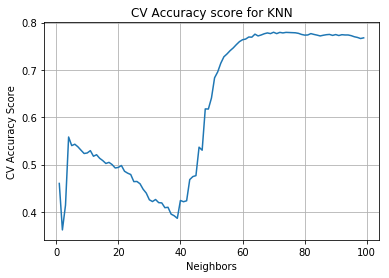

In [48]:
scores = []
neighbors = [i for i in range(1, 100)]

for i in range (1,100) :
    clf = KNeighborsClassifier(n_neighbors = i)
    scores.append(cross_val_score(clf, X_1, Y, cv=5, scoring = 'accuracy').mean())

fig, ax = plt.subplots()
ax.plot(neighbors, scores)

ax.set(xlabel='Neighbors', ylabel='CV Accuracy Score',
       title='CV Accuracy score for KNN')
ax.grid()

plt.show()

In [49]:
clf = KNeighborsClassifier(n_neighbors = 65)
acc_knn = cross_val_score(clf, X_1, Y, cv=5, scoring = 'accuracy').mean()
y_pred_knn = cross_val_predict(clf, X_1, Y, cv=10)
print('Accuracy KNN: ', acc_knn)

Accuracy KNN:  0.771743041874408


In [50]:
print(classification_report(Y,y_pred_knn))
f1_m_knn = f1_score(Y,y_pred_knn, average='macro')
f1_w_knn = f1_score(Y,y_pred_knn, average='weighted')

             precision    recall  f1-score   support

          A       0.91      0.07      0.13       432
          F       0.84      0.89      0.87      2131
          S       0.59      0.77      0.67       902

avg / total       0.79      0.76      0.72      3465



### Gaussian Naïve Bayes

In [64]:
clf = OneVsRestClassifier(GaussianNB())
y_pred_GNB = cross_val_predict(clf, X_1.toarray(), Y, cv=10)
acc_GNB = cross_val_score(clf, X_1.toarray(), Y, cv=10, scoring = 'accuracy').mean()
print("Gaussian NB CV Mean:", acc_GNB)

Gaussian NB CV Mean: 0.6715410155614178


In [77]:
print(classification_report(Y,y_pred_GNB))
f1_m_GNB = f1_score(Y,y_pred_GNB, average='macro')
f1_w_GNB = f1_score(Y,y_pred_GNB, average='weighted')

             precision    recall  f1-score   support

          A       0.68      0.35      0.47       432
          F       0.92      0.65      0.76      2131
          S       0.46      0.88      0.60       902

avg / total       0.77      0.67      0.68      3465



### Multinomial Naïve Bayes

In [37]:
clf = OneVsRestClassifier(MultinomialNB(alpha=0.41))
y_pred_MNB= cross_val_predict(clf, X_1.toarray(), Y, cv=10)
acc_MNB = cross_val_score(clf, X_1.toarray(), Y, cv=10, scoring = 'accuracy').mean()
print("Multinomial NB CV Mean:", acc_MNB)

Multinomial NB CV Mean: 0.8538270570898758


In [38]:
print(classification_report(Y,y_pred_MNB))
f1_m_MNB = f1_score(Y,y_pred_MNB, average='macro')
f1_w_MNB = f1_score(Y,y_pred_MNB, average='weighted')

             precision    recall  f1-score   support

          A       0.86      0.59      0.70       417
          F       0.87      0.95      0.91      2108
          S       0.81      0.75      0.78       861

avg / total       0.85      0.85      0.85      3386



### Bernoulli Naïve Bayes

In [70]:
clf = BernoulliNB(alpha=0.3)
y_pred_BNB= cross_val_predict(clf, X_1.toarray(), Y, cv=10)
acc_BNB = cross_val_score(clf, X_1.toarray(), Y, cv=10, scoring = 'accuracy').mean()
print("Bernoulli NB CV Mean:", acc_BNB)

Bernoulli NB CV Mean: 0.8320240504157879


In [71]:
print(classification_report(Y,y_pred_BNB))
f1_m_BNB = f1_score(Y,y_pred_BNB, average='macro')
f1_w_BNB = f1_score(Y,y_pred_BNB, average='weighted')

             precision    recall  f1-score   support

          A       0.68      0.71      0.70       432
          F       0.89      0.89      0.89      2131
          S       0.76      0.75      0.76       902

avg / total       0.83      0.83      0.83      3465



### Decision Tree

In [72]:
clf = DecisionTreeClassifier()
y_pred_DT = cross_val_predict(clf, X_1.toarray(), Y, cv=10)
acc_DT = cross_val_score(clf, X_1.toarray(), Y, cv=10, scoring = 'accuracy').mean()
print("Decision Tree CV Mean:", acc_DT)

Decision Tree CV Mean: 0.7367925367028132


In [73]:
print(classification_report(Y,y_pred_DT))
f1_m_DT = f1_score(Y,y_pred_DT, average='macro')
f1_w_DT = f1_score(Y,y_pred_DT, average='weighted')

             precision    recall  f1-score   support

          A       0.59      0.59      0.59       432
          F       0.85      0.77      0.81      2131
          S       0.58      0.70      0.64       902

avg / total       0.75      0.73      0.74      3465



### Random Forest

In [74]:
clf = RandomForestClassifier(n_estimators=100)
y_pred_RF= cross_val_predict(clf, X_1.toarray(), Y, cv=10)
acc_RF = cross_val_score(clf, X_1.toarray(), Y, cv=10, scoring = 'accuracy').mean()
print("Random Forest CV Mean:", acc_RF)

Random Forest CV Mean: 0.8086650231619371


In [75]:
print(classification_report(Y,y_pred_RF))
f1_m_RF = f1_score(Y,y_pred_RF, average='macro')
f1_w_RF = f1_score(Y,y_pred_RF, average='weighted')

             precision    recall  f1-score   support

          A       0.72      0.63      0.67       432
          F       0.86      0.88      0.87      2131
          S       0.72      0.73      0.73       902

avg / total       0.81      0.81      0.81      3465



### Evaluation of models

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'SVC', 'KNN', 'Gaussian NB' , 'Multinomial NB','Bernoulli NB','Decision Tree', 'Random Forest',],
    'Accuracy': [acc_LR, acc_svc, acc_knn, acc_GNB, acc_MNB, acc_BNB, acc_DT, acc_RF],
    'F1_macro': [f1_m_LR,f1_m_svc,f1_m_knn,f1_m_GNB,f1_m_MNB,f1_m_BNB,f1_m_DT,f1_m_RF],
    'F1_weighted': [f1_w_LR,f1_w_svc,f1_w_knn,f1_w_GNB,f1_w_MNB,f1_w_BNB,f1_w_DT,f1_w_RF]})
models['best_Accuracy'] = models.sort_values(by='Accuracy',ascending=False)['Model'].reset_index(drop=True)
models['best_F1_macro'] = models.sort_values(by='F1_macro',ascending=False)['Model'].reset_index(drop=True)
models['best_F1_weighted'] = models.sort_values(by='F1_weighted',ascending=False)['Model'].reset_index(drop=True)
models

,Model,Accuracy,F1_macro,F1_weighted,best_Accuracy,best_F1_macro,best_F1_weighted
0,Logistic Regression,0.837794,0.782511,0.834171,Multinomial NB,Logistic Regression,Multinomial NB
1,SVC,0.838373,0.777564,0.832704,SVC,Bernoulli NB,Logistic Regression
2,KNN,0.771743,0.556199,0.723360,Logistic Regression,Multinomial NB,SVC
3,Gaussian NB,0.671541,0.609326,0.681826,Bernoulli NB,SVC,Bernoulli NB
4,Multinomial NB,0.842136,0.780758,0.836443,Random Forest,Random Forest,Random Forest
5,Bernoulli NB,0.832024,0.781627,0.832369,KNN,Decision Tree,Decision Tree
6,Decision Tree,0.736793,0.679013,0.736129,Decision Tree,Gaussian NB,KNN
7,Random Forest,0.808665,0.757258,0.809609,Gaussian NB,KNN,Gaussian NB


Checking best params for Multinomial NB

In [57]:
param_grid = {'alpha': np.arange(0.2,0.5,0.01)}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10,scoring='f1_macro')
grid_search.fit(X_1.toarray(), Y)
grid_search.best_params_
clf = grid_search.best_estimator_
y_pred_best_MNB = cross_val_predict(clf, X_1.toarray(), Y, cv=10)

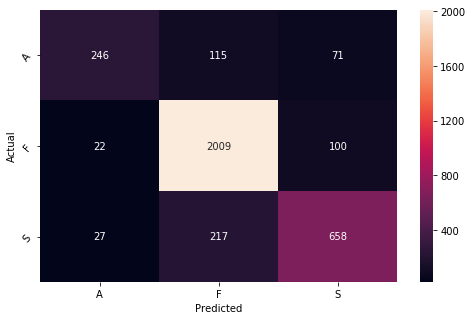

In [368]:
conf_mat = confusion_matrix(Y,y_pred_best_MNB)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(np.arange(3)+0.5, ['A','F','S'])
plt.yticks(np.arange(3)+0.5, ['A','F','S'], rotation=50)
plt.show()

### Multinomial NB removing low probabilities

Now, we will predict probabilities and remove the entries who don't have probs greater than some treshold. By doing this, we would want to gain a lot in precision and accuracy whlie trying to keep as many data as possible.

In [39]:
clf = OneVsRestClassifier(MultinomialNB(alpha=0.41))
clf.fit(X_1.toarray(), Y)
y_pred_MNB= cross_val_predict(clf, X_1.toarray(), Y, cv=10, method='predict_proba')
acc_MNB = cross_val_score(clf, X_1.toarray(), Y, cv=10, scoring = 'accuracy').mean()
print("Multinomial NB CV Mean:", acc_MNB)

Multinomial NB CV Mean: 0.8538270570898758


In [160]:
from sklearn.metrics import precision_score
def make_pred(y_pred, df, treshold=0.5):
    
    predictions = []
    df_final = pd.DataFrame(columns=df.columns)
    dict_topic_pred = {0:'A', 1:'F', 2:'S'}
    for i, pred in enumerate(y_pred):
        for j, el in enumerate(pred):
            if el>treshold:
                predictions.append((i,dict_topic_pred[j]))
                df_final.loc[df_final.shape[0]] = df.loc[i].copy()
    df_final['prediction'] = [pred[1] for pred in predictions]
    df_final['precision'] = precision_score(df_final.label,df_final.prediction, average='macro')
    
    return df_final

Let's try different tresholds

In [423]:
df_list = []
for i in np.arange(0.45,0.9,0.05):
    df_list.append(make_pred(y_pred_MNB,df_labeled, i))

Now we will plot 2 graphs:
- number of entries in function of treshold
- precision in function of treshold

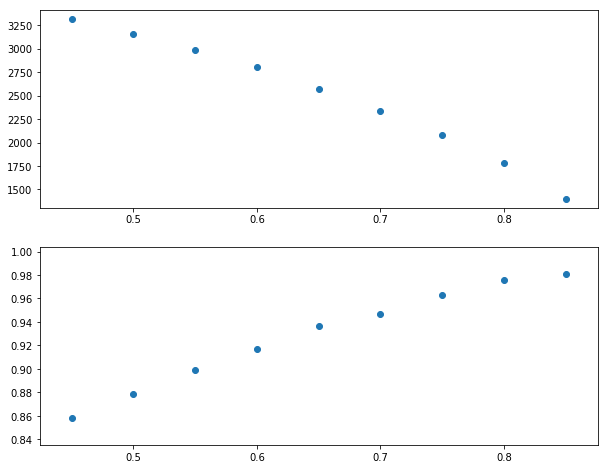

In [424]:
prep = []
size = []
for i in df_list:
    prep.append(i.precision.mean())
    size.append(len(i))

fig = plt.figure(figsize=(10, 8)) 
ax0 = plt.subplot(211)
ax0.scatter(np.arange(0.45,0.9,0.05),size)
ax1 = plt.subplot(212)
ax1.scatter(np.arange(0.45,0.9,0.05),prep)  

0.5 as a treshold seems a good tradeoff between gaining a little precision and keeping as much data as possible 

In [161]:
df_final = make_pred(y_pred_MNB, df_labeled)

In [162]:
print(classification_report(df_final.label,df_final.prediction))

             precision    recall  f1-score   support

          A       0.90      0.64      0.75       328
          F       0.89      0.96      0.93      2032
          S       0.84      0.78      0.81       791

avg / total       0.88      0.88      0.88      3151



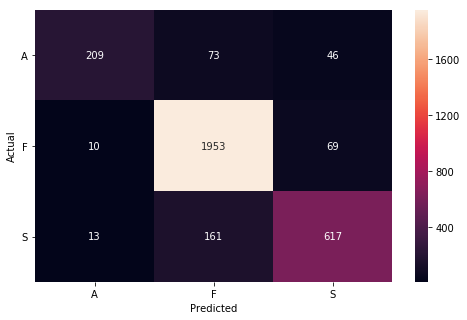

In [163]:
conf_mat = confusion_matrix(df_final.label,df_final.prediction)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(np.arange(3)+0.5, ['A','F','S'])
plt.yticks(np.arange(3)+0.5, ['A','F','S'], rotation=0)
plt.show()

## Sentiment Analysis with TextBlob

Let's perform sentiment analysis on each sentence and then group sentences by topic in each sentence, average each note of the topic and finally average notes for 3 topics

In [40]:
from textblob import TextBlob
df_labeled['sentiment']=df_labeled['sentence'].progress_apply(lambda x:TextBlob(x).sentiment[0])
df_labeled.head()

,index,numbers,stars,sentence,label,star_label,sentiment
0,182,14,5,It used to be a smaller place but now it's pre...,A,4.0,0.125
1,183,14,5,The decor is simple and effective.,A,4.0,0.300
2,184,14,5,Service is good.,S,4.0,0.700
3,185,14,5,"Open kitchen, just the way I like it.",A,4.0,0.000
4,186,14,5,I liked how our server suggested what kind of ...,S,4.0,0.600


In [41]:
#df_sentiment.to_csv('df_sentiment.csv',index=False)

In [42]:
df_grouped = pd.DataFrame(df_labeled.groupby(['numbers','label','stars'])['sentiment'].mean())
df_grouped.head()

sentiment
numbers label stars           
14      A     5       0.171726
        F     5       0.500397
        S     5       0.650000
59      F     5       0.325397
64      A     5       0.194940

In [43]:
topic = []
number = []

for el in tqdm(df_grouped.index):
    number.append(el[0])
    topic.append(el[1])

100%|██████████████████████████████████████████████████████████████████████████| 1030/1030 [00:00<00:00, 415557.25it/s]


In [44]:
df_grouped = pd.DataFrame({'number':number})
df_grouped['topic']=topic
df_grouped['sentiment']=df_labeled.sentiment

df_grouped = pd.DataFrame(df_labeled.groupby(['numbers','stars'])['sentiment'].mean())

df_grouped.head()

,,sentiment
numbers,stars,
14,5,0.422283
59,5,0.325397
64,5,0.162777
79,4,-0.041667
95,4,0.020238


(-0.6, 1.1)

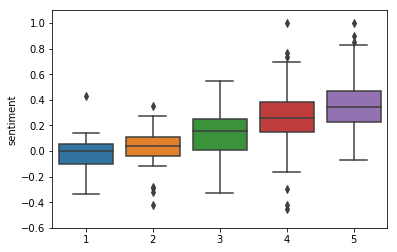

In [45]:
sns.boxplot(x=df_grouped.index.labels[1]+1, y="sentiment", data=df_grouped)
plt.ylim((-0.6,1.1))

## Darden Restaurants

In [46]:
darden = pd.read_csv('darden_restaurants.csv')
darden['number'] = darden.index
darden.head()

,review,stars,address,name,number
0,Remains my favorite restaurant in NYC. I visit...,5.0,"120 Broadway, New York, NY 10271",The Capital Grille,0
1,"Probably torn between a 2 and a 3, but I'll be...",3.0,"120 Broadway, New York, NY 10271",The Capital Grille,1
2,If you made a lot of money that day in the st...,4.0,"120 Broadway, New York, NY 10271",The Capital Grille,2
3,I really wanted to give it a four-star as I en...,3.0,"120 Broadway, New York, NY 10271",The Capital Grille,3
4,*This is a NYC Restaurant Week review** Had to...,5.0,"120 Broadway, New York, NY 10271",The Capital Grille,4


In [47]:
print('We have {} reviews of {} Darden restaurants in NYC'.format(darden.shape[0], len(darden.address.unique())))

We have 4163 reviews of 18 Darden restaurants in NYC


### Geolocation
<b><i> conda install -c conda-forge geopy </i></b>

In [48]:
df_adresses = darden[['name','address']].copy()
df_adresses['latitude'] = None
df_adresses['longitude'] = None
df_adresses.drop_duplicates(inplace=True)
df_adresses.reset_index(inplace=True,drop=True)

Lat_Long are hardcoded because geopy API crashes often at this time

In [49]:
lat_long = [(40.708671, -74.010968), (40.751022, -73.974982), (40.760967, -73.981091), (40.759381, -73.984524), (40.791590, -74.050435), (40.734242, -73.868819), (40.807965, -73.946011), (40.651177, -73.869029), (40.866282, -73.825012), (40.665103, -73.723019), (40.916843, -74.058293), (40.661094, -74.108653), (40.734504, -73.867923), (40.902393, -74.072074), (40.965826, -73.857277), (40.740273, -73.615435), (40.545929, -74.332831), (40.916893, -74.058549)]

In [50]:
for i,el in enumerate(lat_long):
    df_adresses.loc[i, 'latitude'] = el[0]
    df_adresses.loc[i, 'longitude'] = el[1]
df_adresses

,name,address,latitude,longitude
0,The Capital Grille,"120 Broadway, New York, NY 10271",40.7087,-74.011
1,The Capital Grille,"155 E 42nd St, New York, NY 10017",40.751,-73.975
2,The Capital Grille,"120 W 51st St, New York, NY 10020",40.761,-73.9811
3,Olive Garden Italian Restaurant,"2 Times Sq, New York, NY 10036",40.7594,-73.9845
4,Olive Garden Italian Restaurant,"500 State Rt 3, Secaucus, NJ 07094",40.7916,-74.0504
5,Olive Garden Italian Restaurant,"92-10 59th Ave, Elmhurst, NY 11373",40.7342,-73.8688
6,Olive Garden Italian Restaurant,"100 W 125th St, New York, NY 10027",40.808,-73.946
7,Olive Garden Italian Restaurant,"Located in, Gateway Center",40.6512,-73.869
8,Olive Garden Italian Restaurant,"200 Baychester Ave, Bronx, NY 10475",40.8663,-73.825
9,Olive Garden Italian Restaurant,"610 W Sunrise Hwy, Valley Stream, NY 11581",40.6651,-73.723


In [51]:
darden = darden.merge(df_adresses,on='address')

### Topics and sentiments of Darden restaurants

In [52]:
darden['review'] = darden['review'].progress_apply(lambda x: nltk.sent_tokenize(x))
lemma = WordNetLemmatizer()
darden_sentences = pd.DataFrame()
numbers = []
sentences = []
stars = []
for i in tqdm(range(darden.shape[0])):
    for sent in darden.at[i,'review']:
        numbers.append(darden.loc[i,'number'])
        sent = sent.replace('.','').replace(',','').replace(':','').replace('!','').replace('?','')
        sentences.append(sent)
        stars.append(darden.stars[i])
darden_sentences['numbers'] = numbers
darden_sentences['sentence'] = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(sentence.lower(),pos='a'),pos='v'),pos='n') for sentence in sentences]
darden_sentences['stars'] = stars
darden_sentences['longitude'] = darden.longitude
darden_sentences['latitude'] = darden.latitude

100%|████████████████████████████████████████████████████████████████████████████| 4163/4163 [00:01<00:00, 3209.52it/s]


In [53]:
X=darden_sentences['sentence'].astype(str)
X_1= vect.transform(X)

y_pred_darden = clf.predict(X_1.toarray())
darden_sentences['predictions'] = y_pred_darden

In [54]:
darden_sentences['sentiment']=darden_sentences['sentence'].progress_apply(lambda x:TextBlob(x).sentiment[0])
darden_sentences.head()

,numbers,sentence,stars,longitude,latitude,predictions,sentiment
0,0,remains my favorite restaurant in nyc,5.0,-74.011,40.7087,F,0.500
1,0,i visit about once a month since it's by my work,5.0,-74.011,40.7087,S,0.000
2,0,i also tend to take out-of-town guests here,5.0,-74.011,40.7087,F,0.000
3,0,the steaks are always prepared very well and t...,5.0,-74.011,40.7087,F,0.200
4,0,the staff has the upmost professionalism and a...,5.0,-74.011,40.7087,S,-0.125


In [56]:
def scale(x):
    scale = 5
    maximum = abs(df_grouped.sentiment.max())
    return x/maximum * scale

df_grouped = pd.DataFrame(darden_sentences.groupby(['latitude','longitude','predictions'])['sentiment'].mean())
df_grouped.reset_index(inplace=True)
df_grouped['sentiment'] = df_grouped.sentiment.progress_apply(scale)
df_grouped.head()

,latitude,longitude,predictions,sentiment
0,40.545929,-74.332831,A,4.267285
1,40.545929,-74.332831,F,3.862620
2,40.545929,-74.332831,S,3.932960
3,40.651177,-73.869029,A,4.258090
4,40.651177,-73.869029,F,3.709174


### Visualizaton 

In [57]:
from bokeh.io import output_notebook, show, push_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.tile_providers import CARTODBPOSITRON_RETINA
from bokeh.models import HoverTool, ColorBar, LogTicker, ColumnDataSource
from bokeh.layouts import gridplot
from ipywidgets import ToggleButtons
from ipywidgets import interact

Loading BokehJS ...

In [58]:
sent_A = []
sent_F = []
sent_S = []
for el in df_grouped.values:
    if el[2]=='A':
        sent_A.append(el[3])
    elif el[2]=='F':
        sent_F.append(el[3])
    else:
        sent_S.append(el[3])

for bokeh plots, we need to convert longitude and latitue to web mercator coordinates (in meters)

In [59]:
def wgs84_to_web_mercator(lon, lat):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    x = lon * (k * np.pi/180.0)
    y = np.log(np.tan((90 + lat) * np.pi/360.0)) * k
    return (x,y)

In [60]:
webmercator_coordinates = []
for el in df_adresses[['latitude','longitude']].values:
    webmercator_coordinates.append(wgs84_to_web_mercator(el[1], el[0]))

In [61]:
lat = []
lon = []
for el in webmercator_coordinates:
    lat.append(el[0])
    lon.append(el[1])

Let's define data we will want when hoovering over points in the plot

In [62]:
def select_topic(topic):
    if(topic=='A'):
        return sent_A
    elif topic=='F':
        return sent_F
    else:
        return sent_S

def select_source(topic='F'):
    source = ColumnDataSource(
            data=dict(
                x = lat,
                y = lon,
                name = df_adresses.name,
                address = df_adresses.address,
                imgs=[
                    'https://media.thecapitalgrille.com/images/site/ext/locations/TCG-8039-WallStreet-NewYork-NY-Ext-574x250.jpg',
                    'https://media.thecapitalgrille.com/images/site/ext/locations/TCG-8021-NewYork-NY-Ext-574x250.jpg',
                    'https://cdn3.gbot.me/photos/l4/vJ/1362686576/-The_Capital_Grille___Midt-20000000005720086-500x375.jpg',
                    'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGB8XGBgYFxoaFxsaFyAaGCAXGhgbHiggGRslHhcdITEiJSotLi4uGB8zODMtNygtLisBCgoKDg0OGxAQGy0lICY3LS0tLy8vLS0tLS0tLS4uLTUtLS0tLS0tLS0tLS8tLS0tLS0tLS0tLS0tLy0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAFBgQHAAIDAQj/xABCEAACAQIEAwYEBAQDBwQDAAABAhEAAwQSITEFBkETIlFhcYEykaGxB0LB0RQjUvBicuEWM4KSssLxFSRDojRTg//EABoBAAIDAQEAAAAAAAAAAAAAAAMEAAECBQb/xAA1EQACAQMDAQUHAgYDAQAAAAAAAQIDESEEEjFRBRNBYXEigZGhscHw0eEUFSMyUvFTYrJC/9oADAMBAAIRAxEAPwCkA1dbWJZdmI9Ca4VlXclgrZ41eX88+tELHMrAQy6b6Hr4xt1+tLVbMa0pMy4oeOFc1LauLcRyjjYkfQ9CD4UewnG8I94Yhrctmz5EuAWy+8wyllE6xJ+WlVfhLTO2URPnUm5gLq65J811/wBa0qnUw4lvcO5sf+O/ibo7hXsyF1ypMiPEg6nx18q0wPA3bGg24az2ucXQRkyZs0k9DHQ6zVRWsbcQ6Mynzn9aIWOYLg3Ib1GtXvRW1ouy9jbd/jNprZDKoy5hsxVHJIPUdJ8qi8KfNxa6hGZLj3UdTsVGbceqiq24Xzo9lg6jKw2YBSR00zDTfpRzA8+hXe4vZpdec1zJ3u9qSNcoJ8hV3RWSfxjDC1eu21MhXKg+QJFQkOlaW8YjgkOGJ1mZnzradKshX/Hv/wAi56j/AKRQ+an8bf8An3PX9BULMKXk8m02ahqmYfid5PhuMPKZHyOlR4FczUTLTTDtjme6PiVW/wDqfmNPpROxzLab4gy+0j6a/SlCKytKoytqH63etXRAZHHhofoaiYngNljouX/KY+m30pNDVMw3FLybOfQ94fXatb0+USzXAXbgl1NbV32Mj7aH5VsvGMZZ0dSw+Y+YkCuOH5mb86A+amD8jNEsPxyw+7FT/iEfUaVLRfBLvxN8JzkhEOseYoth+N22AyXDM+Me3hQy9gbN0TlRv8Qif+YUMxHLizNtyp89R89CPrU2FXQ8Bluad4EjpGU/UfrUK7YysymI8xHv/YpNFvF2diWHgJP03mpmF5wdTFxSOhH7g7fKrSRmW4NYi33ZXadY7yn7/Woy4NbhPdjSQViPlqI+VdMJxy04IVlBPTYn9qn4bIWWJP8AkPeny8/Ko4tGVPORYuYDWFgzsNQfTXT61Av2oJBH6GnXEcMmSr9fhZYb50LxXD/ET5b+WsbVQSLuLF2wQY19CINcCtMF/BtlkTA8O9BHTxGlQnwLQCBmB8NfoPSquE2s4cDvm3iLLj8txT9RVqX8UXJQ6hwVI3308Dt4xVTC3B8CP0q7+Rboft1Md+yHB6iJkz4d4UKVNSqRkdPRVIw09bdG+F83Z/VCeOT8V1VF8ndAw8JE6GNayribDpci5HxAN8KnQgeImsp7cjjWR8jVlZWUmHMrZ68ra5vVkCHAl75MbD70Tx3Exb0AJPyoZwy9kR266AeZ10rfDY7vFnGp6+EdAKmyTylcy7N5OOMxhuRmTbaCRv7Vxwotyc8x08qIXcaDt9a5cPwXb3So/wBABuaxKTim5KxUnGMW28GgwIIlXj1+m1aHA3RsA3of3pjflm0S1q1fJvIJysBlJ6gQND7ncVpw7hV50lFBynKQWCtI8mIoUdRBq97euBSOupSV729cc8c9RZLMp1BB9xXe1xS4uzsPefvRPHoYdSCCJEeYoNcwpAB9Ovj5R5UZSGVKLVznfus7Fm1J1Nc6krhGldhm2NdW4bc6DMPI/vrUua3Ig1k10uWyvxKR6iPvWsVZdzA9e5q8K15UJZErMCOlepYBFRK2VyNiazboY2PwZ2No1qVI6V4uII862OI8qmSe0jy3cKmQSD5GDRDD8bvLu2YeDCfqNajC6pHT3rxrQ6Vam0VvXig5Z5kU/HbI81II+RipQxOHuiMynybQ/I0pVlE3vxN7egz3+XrbfDKnyMj5Gov8DibWtu5mA6TB+R/ehOGxly38DlfKdPkdKJWOYHHxqrendP7fSrUl6FNPxyEsPzdftEC/bkba/pPX3qcOYrN2O9lPgdPYHrQ23xiywhpX1Ej6TXr8MsXfhyz4oR9hp9Kt5KUUndBK32e7nWdwYJ9x/rWtjBwTlbTNPemZ6HQefhQRuDXbf+6uGPA7ft9K8XHX7ely2SB1X9tR9qG4hozsGb2AksSNAdesT4EevlVi8qcYw9nDWwttnxCh0AtpJuAnQs3UABd9RG1VPh+IZ5i5odCG0+skfWnvk7mHD2LDJct3L9xmOS2uqsIBOY6AjT8xI8t6pblwMQnSb/qJ28nb8Q04bmLFKiqRhQQACGuQ2mmoB09KyhTc+8QBhMNYtqNAhuAFQOkDT5VlatUNPU6b/jXxZQ1e1gr2sihlb3F1Naii97hVyC+RspOjZTEDTfatJNmJSUeSBYHd03zfYV0VN66WsNpXd8GVCmNDMa+FPaKaT2P3A6jxciZfEUyciWe87xuwWY0gQ1AhYJkDT2px5FtkW3Wdmn5gKKS7Xn7LghDtCTWmk+tvqBeBYjNjEbN8Tn5GaceFWAmKveDdm3udSfmDSTythz/E2tNQTJkdAelW9iuDWkdbltDLIM0MSOjbGf6vH2rl16Ept7ei+pz+0labtxtX/rBTq3mzZ9Zmdep86Nc8GFtiJLGSxAnQLoDuASxqGnBnz92SFK5vIEiJ+dEufMMYs6E6H7W+nSmqlJ95HHUZqTjLUUref0wcOH8Is3MILpzhkBkg6ZgD0g6aeIro3BSLKXluKQ0CIjvExlBk6j2qXyODctXrMTIn/nGWfvUHjRKYbDW/ENcP/GYH/SaW3TVTbfx+VgHe1VWdNS8fXFmz2/wbEAf7ssPFYYfIftQa9grR0KAHy0NWBiS+bD5GiFdm8CFCkg/vShzGyribgB0JzD/jAb9a1QrSk7MNodbOrLbLpfHrYW8dgQglSYmoTqQYI1p6OAsJh1uXwxFwgAKYyjfN5+NBOYOGi1iFAJYEK2seMdPSjxrJy2j9LWwnPYvPPg7c2AK251rDZNMvDbDLad8vcFwr5SRMfSvXtW21Kgemn2re9Bu+QrFTXlHcTgV/KT76/Wg7pHzitKVwkaikcqwGtsteFa0bMmtletKyoWSA4NbBB0qMK9FQsk9nXmUjX7Vrbze3nU1LMAF2VAdQTMnpookn6DzqrlnuH4ldXZyR4Nr99anWuPf1p7qf0P70Na+uyIWP9T/ogMD/AIi1dMNgr99zlD3G3bKM0ADduiiBudNKneWy+CtqYWW/hrhkkA+LDKfn/rTNwTDW772rTEhAO72ZCSVWO8yjM2kjf8xpY4tyniMMwTEKEYqHCyGMGRBjSe6diafeRuB4dLFu+iTcYGWJJ1BKmBsux2FKa/VdzRbzd4TXUFVwgqnL2EAj+HtH1QE+5Ik1lFdKyvK9/V/yfxYtk+a69FesK8Fe3HTpaEketW5wW/lt2VDA6MdJ8+nqaqbCDvr/AJh96tTAYzDIEXtrYIUD4oOp1kkD19DTOndrimri3FFr8E4Rh72HU3rFq4STq6KTvG5E1y4h+HXD7qkdiU6jI7CPQEkD5VJ5V4habDplu2232dT1PgaYFbShyw7hY/2nzynKSZmK3GEFgAQDsepEeFdeC8Oezd1KlG0OsHyOseNMllNHP+Y/c0OueP8Af0odZKq/aBzpKdJ05cMh8M5TuWsS7lRl2tkbnOdJ8PCn7HoQilpBIgZddso6nQaeA66Uk8DxTHFW1MkB9B0G/TSj3OGOu2jaC3uyBDbiQduhUD71I0NqbvnBzKmjlJSvK7dl7kA8Lw02sOxaQ925bUBgM4UMu4HU6+0VE/EMd6zERlP/AG1HxvNt/OB2itlbMCUyz3SDMRGjH6UN47zIcSgV0RSCGlQQdojXy+wq1GW67Bw0lRVFN28fpYMfh+M15QQxlQI0yjLGvyBqXzhgLJvHMNESAoMH+qPARmPzoJyhjRbu2S1yFDgZR8WuhPkBNMnEGW5fZmPdLN3vBSYmOsDoKxOC3Jh1pv67qBo8OACIB8aEAkDQQDv7mfGKq7H8sYhDIAMqG0YbGejR4Grixdu3fCZL6AIBBBEwQVOnQkH+4pf5hvWxfvwTCKoIGwEZgB470vSppSFtJSlSqO3jf5cCfzbhH7LDIFOsgaR/TFA+O2bua0bltky21STsSJMyNNQaeeKXBiMBbdZLWmymBqBsDp6qanc18NVsNbLKMwtlvOQBR6Ol3u0Xxf8AUCtQ9O4wa4b9c/7AfDcHPDj4tnYeiEH6kiufKeKPYYgaEIpcA6iYO467U44LhtsJZsrmzG3Mflgk6N8qXuA8MFm9ftFlfSGAmYBMj1I096TraSrTjLcscif8Qpwnfxaa+IK4lgLQxVo5BkugSoJUSfCNhJoZzJy5bVbrWiZtsM6nXcA5l6xqN560Y5mtsMTYcf7s5csdIIn+/wDzUy9ZnE4lDs9tSZ10j9qXUpx2u/5cZpaicNs1Lw+9voxI4ZwO+9nPaCMCdVJ1B22OnTxobjeG3VAL2soJ0IBg+X9+FO/J1vPZZDsLitIOsAD+/eu+EbtLV51lWW8WQeGmYj5g1v8AiZxk0x7+YVITkmk0n9SvMRatj4ST5nTXy61BA8qaOaMGTibjdCR8iBQG0pDbAwdjMH5QYrpqnUUIzlFpPKOvQrKpBSPcJw93MAEnwAk+vkKkCxbUSWlvBRmPu3wr7SfECinCeDYnFuLaKYdgAB3LUnQeC++p9ae+A/hcsziLvwkgpb8QSCC7eY6D3patXhStufPA3GLawVg6NcIVUCidAJLE7anc+gAHlU9+VMRb7M3LLp2k5MwhmIiQE+Ke8NxrNXhatcP4ehdERSJUsoz3JRe0KltTOXWCRUbiPNKlrRs4fPeDMhS9/KuJKG53SQfjVDB2MUSEm87br4fMHL1E/lPkAOnasUZ0drb2bqvlDIYOttx9QR5UzPxLsQMP2OH7x7NUw95Zlp0KMqhfcx51BuYwXcLxJrcgNkxSdD30S4R65rbA+hqIMCrJeuWrWa9axq3UKLLlLpt3I01Kw5PgIrla6jCq263F0kujdrXd1i8kgtObS9n85/Qlc8cTR+xvXcMwuCyAnbEi05+KSLUl9ZgZl8/JV/20vW7PZqtsXCxOdVCqqmIVEGgjxP8ArT7+IljPwy22p7LEEeJAYuoAHhDLVO4u0wOoI9RH0966UFT1FOLmrrDB1YdTW9i2dizHMx1JOpPqTXte2uHXmAZbVxlOxCMQfQgVlNd5FYugGBdBrWvUXXeKxqyGJPDf96n+YVZnMolbTAEqVguB3SxJ0k76Cqz4aP5i+Un5A1Yy8UF6zh7H5kdZOwy6KNZ3730prTySTTFNVCUrNeA48q8Js3LdwvZtt341UHYDr70x2OWrAEqrJp+R3T/pYUB5Rxrdtdw8IEVA8652ZjBMkwRA6AU7OYtsfBSfkDWJuzJBXRSy8KvwTbxLjQ6F2/UGoN2xjV/+UMPRT9wDRlLrxoNIqPevmNRSUq0rjKhgD8u425/EjvWwVJY55C93eSDRfmfmC5dKAWrbQJzW2zLr5Mog6ee9JS3ytx9TBLD6z+lZ2wbLmDTrEH7/ACp1SdheVO51x2NzMSZB66AbdNK53b0kEnSB08KG3t9JGpid+m9d7lkC2jdSxE/pWXI1sVhh4LeIIJdEAIknVz5Dwpju4lCxyqJzOJmdYmR4CovBuVMPes2rjO6sy6wwgnXYRUp+RLf5MQ8+gO/1peVePDCRo8si3s7Kc7ZQba7nQEGSYrsrKf4gAkk25Ph8MiDXl7kbEAnLiFP5RmDSR1ECT9K4DlzHozFWttIyGSBIGkEEaVFUj1L7prNj3AcQu2MrWz8USCND6j9dDrRvi3G82HXt3WShgbE5ugHtSk/C8bb3skgHZWzD6GuV+zfMXHw1xVjcKZI9TMD0FNafUQpXaSdxDW9nrUyTeOuMseX5mlrTm0yBRlOVgWMjTeNNT8+tbYDE4Zb1y+zsiuABnA3Eg91ZaNF6Dc0iXOLstsIFdY3JXU+52rlhsZYGrl2JkkHYHp50tXk55vcxHsmhdq1kO+KxGHu2bSLet5keBmle7OWY1MR3tfCvOKXVttexPaIym0EXK0y2oj7UofxlmYBkmddgJHUn7QfWoeFtXms3cjAW1lnGZQTABj+phptqJoXcXWQdXsqDktjx/p/YZOR2ItX2VScsEAakka5R8qnNh+yNzIpEPaZgJOrhlaPH4vpSly5i7iMQjsu2xpuwdy8xZS05yNSBvoAZ6RAoFWnHfkHLsurOcpJqz/b9/iBOasCVvZ47rgFPPLAOnTpQHF4Q2cQyOJKMJHjEGPlVpX+WmvFHvsFZGkKg7uWSxBJYzOmp2g6a0jc8WgMdcI2YKw91UfcV2HqU9NToL/5vf7fIf0mndONn0SH/AIhh0t37Bt3HWUtNHaMxBVmzRnLZY0gbCdq85zQ2rrJexF8Wu+wPcBZzByFl7MAlWJGZhrOooVzbfKjCX1HxWmO3kh3nTc0384DtcNccE96yt1SpP9A1EeQNcbW1FHZN/wCS917o6dOOGhZs8Au3Ea3YVf4btVuLKsrN21js3ILGAoLNI1M9fHjxzALavYZcVe7a8/YBrbICsK5UiVAGWHYCQSYMmnrla7OFsSZItqD6gAH30qRjOE2LlxLz21a4nwsdxGo9YOonagx7TUbp8K6xzjz9eSnRusC82Hwn8Sv/ALTva2sxgIioGXRASsGSNhofaiWK4jZtqTIhdIUT0mO6I+ET5ATtXmK4NmZma62UsWKzK66RqYECdh1rhb4dhwAsdpEtDEuJ2LFfhzaxMV57tGvp6rjulJ28F+r+wxSjJXtYzjVrteHY5RJIUXl8gArDTzNs1VPLFpP4hWxirkKsQbhAWQJkiY6bHxq6OE2FJuWgoC3LBXLEABTG3T/en5V8+3i/fRyTl09Mpg16Ds5qtoopNrFvPGPsB1EctFkvzrg1MC4YGndttHtptWVVVZWv5Jp+sviv0EtiONzBp0U/M1GfCr50Qu1GauswibPeDqFu5jEKpbvCRoOo0n0pjwePt3L2HKqoc3RmVdAAuXUydNidD1O1LuDsO5dUVnYoYVQSx1EwBrtNScPwtluIXS4gOYs+V4UwYUnTveI863Go4x2oqUN2R64bzNbsYlr6kFJWydJJAC5gmok6aHarhvYu01m4FdSeyLRInKV0MeGo+dfP2F5dRILgt3M+swCfAfvVicBUm20n4UBMEEd4rC/WY8jS1XUdESnTXB1wuBXKdOlDOMYFQpMf3vpTFaGlQ8aAF1+wP3pBTyM2K/t8jYiczFFVidSTOvULHe0NRH5WxKucgldYMqDHQkSNetWqGQic4PTcbeG9d0wtuJDS3tFPS1UnhAZ5wUm/L+JDz2LEa6kg9PJjrWnFLbC2isIIY6QRA18zVz4jA7kjSq55sw6Kw0E77mNz4iswrSk8lJKwe5V4QXw9u4Mx7voBv1oybToIUQI6bkedI3C/xAuWLAw6WUOQRmYnrrsKm2ubcS+Fe8CistxU0QEQVJ2afCo4u4dSRY3AZW0Sx1zE+cHWlu92vavqcsnp50nDm3F5QxxBGYmdEH2FRl5kvnU4k/8AMKji2ki1YfUe8A0jeQOkDxrlw+9dyZW+ECIAj3NL/D+PyjF8X3ukuvgfHzigg5mxAzRiN9PymhypSZpOKeSxrz22UEgH2HjQ7inBsO4jKq6glgBMeFIqcw39B2gI/wAo/SmbhfG0ZmW+UTKBlYmA0zpB2I3qtkou5Xsu6JuG5Vwtxm/lg5UDmWImQPBfP/xSVy9wi3f7YOWBS2zLBgSqlpPlpVh8L4nYRmK37JzJk1dQY0HX+9KWsBwMJ2ht4i2cwZY0OjKy9G/xfSmnUhYV2SFDglrPcKlmHWQYNPGG4VcAUpjLin/EA8fOkzluwzXyo0OUnXy1qyuHcKzICTrSuok0wsEQ7nHL1oAf+oYe6RpkFosT0gizNKPMeLvXLqvetFCVAHcZAwXTMA2tWXyxwjDWEW5bQC8VIZsxJ3IOkwBK9B0pY/FO4GNh8wJhhvJjux7b01HkCp5sEeKfzeHYBvDuH3Rl+6Cnfh7ThMI0Zv5CrGn/AMZy9fCR8qqThnF2bD2MPmICOWIgQTmzg5pk6EiIA9atPli8GwOHMzla4nzOb7CuX2tFvSz+PwaGdLUUn6YJpxVwbLHzb7QPrWhxZbq0dMsH/oB6efStrtyDrcCj/hH1NBuI8cwttXHbq90A5U7Xdo0UhSAJPjArx9BVJ+zFXv0Tf1x8x2SSCLyYNyAOuaAIn/Gx8PtXbD3EkhWLagHcgTqI6dZ0pUwXMZskm6gZCobMttEZWJiILd9NR3hP7TMFzcL5uLbVQUAIzNOac2gVROmX6in6vY2pjUcJQ3+akkvnzbpgGqit09VkacG+W/aPiWU+hVj91FU3zPwjJjcSAYi6YU6aOcw1JgfEKL/7X4+4DctW0UIV7yrmKkkBd2110+H70F44MU91rl0O124RmY21B0hZyqABsB0613+x9NV09Du6nKb88A60lJ3Qt4jA3EYowhgYIDKfqCRWUbscFusoY4wIT+XLeMe66H2rK7O5Cuxi/caoriu761HerMIJ8vYNbjsr31sCB/MbNAIIOXuayYiiOH4MHt5v/UrSlnK5GN3MRmyhjCnfQxvBoBhGgMdtV+mY/pXZbwUplYMZU+8gx86HNMJFlgcQwD9o4/iLYCWR8TMM0dF7sn3iiHK+EYAd4beNJL8UxF7EJmSM7KhhSBlJA6+tWTwCxC1z610rGqQdt2tN5oTxa1IIEbUbRNKE8aXuH0pfoEbKctYRiYEeO4rsvD3M6belBxfuRsw9jXrYy5/i08o+fjXU2szu8glcS4AYYgesfrUDE3HKiSfWa4vfcj831rpbBMbk6RIn/wA1pIy5Ea4O8dY7v70a4GgOCxUnvZrJHzcHz/8AArvc4VaUSwMxBJkb71zwbLbs4u2O8JtZT6M5n5aU1Uoypq8gMJqbwC8QP5BHgf2oPFGmaUb+/Ch12gMKkcCh8K6YlTm9QPsK9fceld8QRKegn5CoQjJh2ImNPGNPnRjh3DLzgAW2bMAy6HVdpGmomoj32OhOnTWQN9PL2po5S41eR7At2wzoptpJMNJnxEQY6xrWVdmZy25B9zgN8Whd7BuzbUMBII9QKGizm0CE6Hbyn9qs3Ctjjhlzogw6ys6F5zlYBJMAExp4UjcOso1tyyoWWT3tyupPrG9ElGxiE3LGDhyriSmLQgT8SwzQNRB1q4OEp/L3X5g/aqb4enZY0BhEXCIAjQ9ADtvV28FxKgDLJHXw9ppLURTaYSLKw5i4pft3rtlL4VQ790B5h2LanKf6uhoOtibUZ1+KdFuTsemTUedWBzFh2Hbm2qhmvLDeRSTpB8RrHSKzH2D/AAoRwpEhjr3pOnhtr505Sa2JgnC7bS4F7lvhbPYuEFTlb4ezhjK//saCo0PSPnoeuWcbcGW3NoKCSisck75yqbmAJOXXyFC+W8bcw3aKpBkg6rO06QfWrQ4XzVbFpe2hr0Qe6sz5ZRHyoe6Lk4SyNrTSVNVI8P4srtOF3Ucrf1zwSwEPIJjVlDRMg5dddfAn+DcAsAdrPaHZmcoVgE/CtxZXbxMUP5pxJa+XBcq3eGZmOUnRl1+HVTp4RQa5iAokgknYD+/2oD1Np2Ufz4HQh2YpU1KU/l+5I4piit2/ZtoDaeRoimMwEgOpAHWI01nrRvgl/C4ZYRnUtuVWWQldWUkat+XUkakjelTD4pi/wKqsROcx5aRMn3qThcBiS2Q22LkkqAjAlRHejXSetSeoqpXSRdHRUN1m3fPl5dCbxfEfzVbDMFTdw6QS06kBWI2rhhsQyhlcpcQzCldVzdQ0z+lSzwJ7XexYawniymWPgv8AelR0t4YtlLXFk90yhGU7HT4jtIB0nypbvq1/2GO40UHlX97+wZwnMN9UVVKQAAJuQY6SBcH2FZUL/ZLFGSiZ1kww0BgxMHasqu8n5/nuC91pf+v57ytcZhnQ5XEH9KhXBX0LzJwTD8Sw0oAHy/y3iGU+BPVT1FfP2KtlGZG+JSVPXUGDr12rqRlc85KntNEQlIALHNsATsD+9b8Jwdw37Q7N/jX8p6H0rRbZNvT+o/b/AFqTy/Z/9xZka5vEHYEzp6VKl9piPI3q9u3dttcYKA4JnyM7b0wcY4oq4NbmGvb3AhZAGIME5YJGu2mlJvPHDWUWr6BijJlY+DKWk6EwDMD/ACnxoz+HvJt3F4e41wMtq4yFWPdB7PP3tdx3o08KV7qLipXCWadrET/aTFiIxN0//wA1Hy72v0qZy/xq/eu3UuXWdRZdoYAagqJ0J8TThb/CvCgEzmYeDxPoYAoS3LdnCds6BgxtlIbcA6nTzga+VVUcErW+SI7rkqe3iCZzM22kV0S1cYSDp5sv2JqPaInzOnWp1i4GXKiE3ASdAToegAkjUb+dMvHBneaCcpzRI8CD9tKP8mWA2KsEo7guYCx8QBImQdt/YUGwmDeCkHP8RHgIk6VnDLTuy27Ql3YKp1ETufYSSfKptuE7y2S2+Y8Hg8QGFm2O3K/lHd/zFUU66bkfsaoxam21+0ylWzCQZ/KT+hnpVqcDQWrZRCSA0FvzMdizHrqDA6CBSZ+JVqSt38wPZuR+YEZlJ9O8Pl4U1Ki1Ty7i38Sp1MKwo4fUGdifH9aO8K5UW/YvXA7ZrYBVQC06ExIECBrrQJgBbDL4T6ET+woxwrmF7Ni6EYZnyrlIkGc0sNogAa+MUnJSfA9TlBK0hWvrDQdxR/lbgZxmJt2pgZczHwUTPvsB5kUGxxDOWAiTMdB6eVOfKXCb9sDETlzWoUBgGIJmZ/L0Pj6UaNOc8RWQCtfyHLH/AIZWWtxh+68jvMxII0zBt4I3BWNiOs0tY7lu5gcTYstdMlgyXEG2YqNA3UEa9NaauCYrFR2rs7qoOS2GHeJDDVYmJMzPtQznnjQuJhrlvMb1vvMCZKnqhG4IZBp79aH3dWLszVSNO1/zoGMFhrdxUwrm5EFs4ZpOWWJj4FJO56T51D5g5FthRewggKGV0ZiwIZSpPj128Na5cmdtetm9eYKGWFgaFVJmV2Jk6e9N3/qKYZC1tWC6lyWknqSRtHjA+VNrS19l3k4/8z0VOq4Rw7lFcSY/xhZontBMGRoAN/anjjnC7t+1h+xBkTOpE7ftQ38TcPZ7a3ibBGW4e8BpDJGo8iD06qaPcI5owqL3sQmvi2xpCvvjtaR0oSjK6WT3lNLmFNwXsOHuPlFtXYMhMNLGD3oCjTxNS+Z3uXiltVSzcuMAyhlKQGGW8ushSPy+K+dLOI4gMTxBHVu4jAC5suTQTPQd5jNReZOLsr3gst/8YuGNUB0Ijx1ge9ahubSfS453Djp+9axeyGfF4vAWrZQnLetgqCiglyNIuFQM2YyZJ0085WcPzhdTurbs5R0ZCxPq0z8oHlSgMTNa9tRo04p3eWAlXm1tWF5FnW+YcO1m9E2rjqrBB3kFxCxlCQSAwYgg9TvFAuH3x3HdzcaJa2yASxM5FbQDQHqNQIpQbE+ddRjLhRsrRp49P31q+7he5nv6lrXC1jjOV7xXuhgGC92cyiJbTX219OrbyBxK4iXQGLt3ROsCQe7Pj4j0qtMRcKXWDESQM5XXUjWPEzr61bGH5ww9uyLWGVGyJ3dCFEmAzba6EnrttQqsL+zFZZuFR33SeEHObO1u4G4SwOW2t24rESgEHOAdx3W/vapbnLuPtkObDqCRD92BJEGQdOnnTphOPBsTbu4lgUe12esBc6kSv9Os5hIIOcCuHPN0m/b7MsUdAqq+mqkzOVcuVRB06T4Uj3k4apUOubu+fTgK2pUnPp+ZGzgvD+KWbFu2BcOUb503JJPxGdz1ryk7BcXvKii3edUHwgMVET/SNp3968rr9wugi6y8/kOa4LEOg7THZRGqWEW2PSSC31FIPPHLuGs2u1/iHN9m7ttgWDL/AFFzqD13NWX2aNsdaUfxSwlz+EVpPZrdEjuhVkEA7SZ230pGEnuOpVjHYyqrultTJGrfWNPpU3lOwTiEY7DMfkjE/oPeoGIP8tPQ/f8A0ovy6Ct6yGMSIPo0j2OtMVF7L9Dnwy7Fv8HwduzYs3sUDlINy2pUsveIIdhsI6T1k+FHRzFaugdjibJMSSS3cA/NlG39+lSecuF3BYsvZk9iMjKFzgppun5gCu1VLxnjK3Lott8AK9wILZfyOza76naKBt2qwxF7mWjw7iJuXAlu4brf1Zcq6QCy/wCET1kEwBsQBn4jXrSq7glVVTbZ20UvEhQxOra/3BrOBX7NopcBdWKhZZWBAUQE10YDxFdfxDxrPw++VuHJlAf/ABBiFKkZToQehFDVpeyMVdO1HJ88XDtl9NPH1ovYxpAPZyADHd0BMfmJBzHTc1Be0GYKoAmTOoGnjv4UQuYI2iVR1KsNxPgRoCNKbi7HIqrwIeHxQzZ2YjpvrtHypg5PtFu1uIRKrkB6d/f6D/7Ut4nAxswywT6fvTdyEoXCu2urMxM6AKAPDpH1otGF53JUnamMfAL7hCHU/Ee9HdPTfx0J96Cc5d6zdJ6PbP1C/wDca9ucQCJAkdSdBqdxI1Y+Z223moPGL3/sTJMsyTO5OZTp6AU1Nra0LwTUk/MT0P8ALb0/Q1xtN9B/f3rrhz3HH99aLY/l25YRXd7cMQmhJyltZaQNgNaQWDoPIJw9vMwB0DMBPqas3gOKF5jmAFu2BnGupGgtggbsR8gT0pR4zfwwxds4ZR2SWwGHxZmGYEnXciNqKcPu3OzIRWAZi4BiFnTNJ1LEDr+ppvT3cfZ8efQu1nZhvEcZ/hyJGY7BZiT8tKW+N44C+xYBC4BIBkD8u516dfOsxmBCRdNzNDAnMQG36a615zOiXAhU6Ze7JJYR4gjQSdN/poetfaZlwTeFccuu1vDqSwAhYOiqNzHQ+dMpRswtBmy6Pc1J0BlVJ21I6CIBqv8Ag1xkZVW5lYAtOsnpl2Ond61Z3L+KAsq7kM76sSwBPQaadABTWlqucbM8j2tRVGanFYf1/wBfMS/xHY5rakEQpbXwJA/7TSOjHMQCasf8SkRrVt1CiCV7pBPeE6x/l+tIGF0ftCqsslYIkSRvFI61f1GdjsaSemjbz+oycv4kZSsajUnyOgH0NReZ8VK5ek/PLP715wa+JdY10M/MR/fjWvMVuVzA7GYncMJkelctO1Zo99XSn2NBrwf3a+4u23rZnrknlW30phHlmeO1ScHcnQ9RFR2tH+zWtkxUWGR8HW8kGIG3yI0qZg8R2YDqRmkyCYnSPeueNfMLegAHdJ6kklpPtA9q5P3SROn9mtcZM84GLhKtiCLNtAWumQOgdQSHPgsSCT0Y+VSrvDLuGtF3XK13uJqCAu7wQSATIWN4J8asX8NOW7OHtq14BL11AWkwVA/J5EnvHzjwpl5m5bTF4W4ixOr2z0DiSpHzKnyI8KzvyaUcHzu9wk/F96yudxHJJke4IPuI3ryt3M2LF41xtMKYdzmOyrqx/b1pZTm27dLG4ua2p7tvMQJIbUkgydPAUw8wcq31um1kF83TnkMqNdS2C2QORowIUkeCmJmkR8OVQkDKHchRmmAANzAn496GqSiGlqHP0OfGb/aOGC5ZAOWZ6xEneiHK2JdeIYQqgd1uoMhOhJOsknzJk7R5UNv4cswURoo1p/8Awk4bh1TFY67DPYlba6dwgAm4AepmB6NWpAo8ll818/C0b2Hs2s15VEZiMssASInvAA9DqaofjHFL926z3mi4xk9zL4bCPKiXMRa5cN24ctxjPgwB2gdFjbpFBLnE2+F4uAe5HyoaaGLSg7pjXwfnC4tvsbpF23GmbQpH9LxInzBFQON8Qu3W7IEpZPeAn4huC3Qny6UuWr5mUg/4WH7a0e4C1u66W7sqoaTlAzBZ7yz+bQkj0qKnG97DcKzrRdN8+Hn5MHnhz2ridsjJmtZ12kqxEHfT318qJWMMt3RA+ZVMCJJ+XmQPlT3+LD2n/hruXK7m4F0ibaZRv1HwEeppL4Zjrlq6hsQ15wUVYmSTPiB06+dVJ7RDuVOau8C/xS01uVdSpiIOh6jb2Pyo7wi8Uw1i1nCK5BaFlm7RpCztBECBrXfmHlriOJi/dsycv5Sp0XTQKxkAyJpdwWEZrikicqnXy2H3otCalKy5B6iCjfogpxLFZ7kbDeTIJjwA2E9PWpGLvKcPdV3RjkOURsw1EHxmhWIVc0GPn/rpUXHYgBQsbn6D1pmacU2xaDUmkiDYEK/sfvWuK4heuwLlxmAMwTpO0xXtj83oKlY3AomHt3JJuOSCv5QB+tJocPeAYNrl0qpA7jsSdgFUsSflHqwora4ybSqFLRAGruOm4gxFNXK3L2HQC4967adrehQDN3jqdjAge80jczWFS/dRCzKrkAt8R6yfWa3Tq2k4p8FtSjC/UN43HvctNLswy7Z2/URUHFYa4iJ2iuuYErnBEiB8M9KiW7hFkiTqske1EuL8wHFLaWI7JMp83fvOQBsubQDwUUzVlx5gKc5SvcB41CCHWZj7VGGIbU0x8K4b/EN2YYKYJkgHw0ALKJ679KXmwjANP5DDezBNPHU0vuaeDTimje/GRDMsS0+QGWPua64TCyASYU77fb2pk5f5csXrCu73J1ELEAg+Y8I+dErHKWHWMz3m8B3VHvoT9RWW78lpKPCFG+ws3QQe6y6z9frRFMQrqLqgPknunx8/LU/IUvcQJzN/SGIUTJjp9AK5Ya6oZc0gBhMb5ZE/ShSp3d/E6um7SlSpulJXi8+/D8/FdMnot95jly6xlnY7wOsV1n3qVzDw9bOIZEMqVDqJmA3Sft5EUPo0eDmTd3c3Irnh8OzvkQSxBIHjlBaB56VmQ134bdKX7TgxluKfqJ+lRmUGeReIW0xCi6ivbcFCGUMATqCB4yI96H8atC1fdVnKGlJEHLMr0HSOnSiPMfAbtnEF7aMUdsylATlY6kQNRB1FD+Z7hbE3GYZWOWV8DkWR85qEsOXBucGvKEuOO1GhLD4umYEH56U88F5pFq2e1YNHwhTp8jBr58Ndf425Edo8bRmaI9JoTiETGvi/Hrdm/dtpZt3FDkh23Oc5/pmj0FZScDWUTcYsfUPHMFaxVmbF1YzZkafhb+kkaqCCfSapjmzhZw7raYEaswB8Dk2I3Gm9Xpa4EuHlsLcy3o+FtbbRrlcDX3Gopf5ssWsemTGYa5ZvpIW7bhss+RIzIfDXyNHecICsO5Q2MtasSNvPypk5I4X2ihSci3dXuM0KFtsRAUbvvE9T4VKsciYm7ee2B/LRgWuDQMmmqSNTGsdOtWzwv8OMLYtBbYdswEMQhYNvmJK+g8vHWhTS4YWm2soh8J4xYynD3mU5iqi3cQMVtAkKpkHOzCAq+cxvQDnfl7B52u2WtJcJytYTKO9pOUKABlG5O5BqDznZv4V0D2bRkHMQQG3hWlNjoNCDv1FLQFwDPBJJPUSPfQdaXlDb4jyqRqZtZkTiPA1OkFGHUwI+Rgig4vGyYPxow1B3G+nkdPnTVatuxAUlj1zP3QPDRZP960J4hy1fvYpkt5G/lhyfhURMjWZYRMCpGXUzNWtKPI1cexVq9g8DfLZmt57LKTBjusBJ3VYXX/EKH8O5sNrE22tWrYLDs82YsYMbaAA6fepHCeVbKWMuIvMzGT3CQq7CVBEsRAkNp5aUj3CbN8ag5XG2gIB3jpIg1mcY1E0aqyanv4uPHFOO4ixdz9pHaWzmgCJLZpAaQNT9NZpbZlW2WBKyY6GQOk9N/wC4o1zHgbuIa2lhS7gSQCBp4ySKF4/BX8MqJetLIBZlJDGGJ3KkijdnwivatkT7Qb/t9Aa7KFJbrMD++tReIp3bTQfzA+uhipOMwwyAr8JO39JPTc9BRTgfDrt5ezWCR3gTEMBoRJ0Da9adqp7XcSov2lbqLVlYB0qfxzD/AAqskAE66bxt5aUyY/ljEZdbIEiRBt9fHKa4Ly1eeO1aGACiIIAHSufKoorJ1adCU3ZIdlsEWLWmoEaz1EjTziq45kw2fFPl/My/UDXyp5u43FZUti2lvLveXKZAEAMGEztrB9d6UOLW2GJ77ZmZlYtAG8DYadKlJxlWlJPwNVqU4UYqS8QZftZLZ/5PPfx2jT60PwjQ5HiPtrRHHN3HHnPyahKEyHHjFO1eV6HOpYv6jNyziMmKtHoTl/5gV/WhN9ZfFCdBnI6/DcBHtpUjOlsqxYzusbSNqi8ItsxuAKzu9txAEkswmfPXWgN3DDv+H5Bw7A9Lh+oWmS5aT+maVuQcC/ZXMwK94QCpBBjX22+RphvSvn6CsNkEfGcrXspUuhVQWXfNIBgRHX10pWt4TNZe4PyOgP8AlcNr81A96tG9jyoLNbIUbnpFJNiyFa/bAfI4WSFJCkMHy6bkTHsatZJwb8b4Tlw1jFFiWuqoI6CE6fIUvmm7mq2yYPCI35REeij96UHrSKZuTXJzArZTWrVbIi7kAKg5l1APXqPOlPivKdm5ce4XuSxkhcse2lGeBWrhsJ2xGePLbptptU1rC9T8qHcsp/juB7G81sEkCIJiSCAdY96gRTh+IeCi7buDZlyz5qZ16bN9DSobZFXYsjmsrZhXtUWfX3C7tq8vdBV+ums+o3rvcQAhboBB0DdfSsrKZkrTsLRd43E3mTFLhsRbwyIzm+e6ikDw0JYgASafnYpa72kCsrKDX4QehzYon8T+J9riLaxous9SCdvQR9aXxdgCfT561lZS64Q6+WbWsWQYTuKTBPU+QHT1NdhxkDKlpmyjMzMSZPU1lZVNE3MhY/i7FQCSWB329Rp6UFwmDbFYjIg1Opk7ARJrKytwQKrJ2Lh4dgkRg4QT5/vvQX8SLRNu1e0BWUMCJDd4T4wQfnWVlHopRkrClZuUXcT8Ova2GXqASPIrLafKPemH8Or04pQVBDI0g7HuzMe1eVldCo7w936iFNJT9/6Fh4nDoNraD0EfQUMxVgHUqp9QDWVlcpxXQ6qnLqDryBRPZJ7BRSXxhmbEg5RAKMB/l18NtDoN4rKyjUP7vcwNXMTOX8CmJvsSZVs0LB/zaz1j7UePJOHYzDDynSRWVlbr4aa6GKLvdPqE8HwOxagC1r4zMmi2HwKgyFAPoJ+dZWUsw5LTAaf617/AKKysqizhiODI4IKqwPQiR7g1yThYQQqqANoAFZWVCCf+IPDXe0rIARbJZtQIBETrvVcLaOvlrWVlGp5Bzdjk7CsyzWVlRZZZbWAw9zsrYaMwRQdZ1AFcL7sDv7VlZQvE14C9zlfLYcBo0cEfIj7Gk6srK2imcWQzXlZWVLEuf//Z',
                    'https://media.olivegarden.com/en_us/images/marketing/olive-garden-tuscan-italian-restaurant-g5-rdv.jpg',
                    'https://media.olivegarden.com/en_us/images/marketing/italian-family-restaurant-olive-garden-g6-r1x1.jpg',
                    'https://cdn20.patchcdn.com/users/22866740/20161213/045556/styles/T800x600/public/article_images/harlem_olive_garden2-1481666140-3458.jpg',
                    'https://media.olivegarden.com/en_us/images/product/exterior-olive-garden_599x430.jpg',
                    'https://media.olivegarden.com/en_us/images/marketing/italian-restaurant-olive-garden-location-g4-rdv.jpg',
                    'https://s3-media2.fl.yelpcdn.com/bphoto/hNEB_tmLB2NstFOqikNnmA/ls.jpg',
                    'https://igx.4sqi.net/img/general/200x200/57505988_DlbvbXrBsjQ8UJN-GlGExbRXjG8ycqgUbV_FH64S5-s.jpg',
                    'https://media.longhornsteakhouse.com/en_us/images/marketing/LH_BuildingFront_599x430.jpg',
                    'http://1.bp.blogspot.com/-uo6F9C4LyW4/VE9-N1NqbPI/AAAAAAAA39M/c7bBuGbwD2Q/s1600/longhorn.jpg',
                    'https://s3-media4.fl.yelpcdn.com/bphoto/A_r9lDoueqPV_d1blHds_A/ls.jpg',
                    'https://media.yardhouse.com/en_us/images/marketing/yonkers-ny-yard-house-599x430.jpg.jpg',
                    'https://media.seasons52.com/en_us/images/marketing/seasons52-4521-garden-city-ny-d-599x430.jpg',
                    'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSExMVFRUXFhUVFxcYFxcXFRcXFxUXFxUXGBkYHSggGBolHRUXITEiJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0lHyUvLS0tLS0tLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAL4BCQMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAABAAIDBQYEB//EAEYQAAEDAgMDCQUFBwMCBwEAAAEAAhEDIQQSMQVBUQYTImFxgZGh0TJCUrHBFBUj4fBDU2JykqKyB4LSwvEzc5Ojs8PTFv/EABkBAAMBAQEAAAAAAAAAAAAAAAABAwIEBf/EAC8RAAICAQIFAQcDBQAAAAAAAAABAhEDEiEEEzFBUSIFMmFxgcHwFEJSIzORsdH/2gAMAwEAAhEDEQA/APNYQRlBe7R5tiQRSTM2BJFBAhJJJJiYkkkkGRSgikgAJIpIACSKSAAikkgAJJJIASSUJjngakDvCVjQ9JNaQbgyEUWOgpJJINUEIoBFFjoSSMJQnYUIIpQkkOhJJJIHQEkUErCgIpJIsVASRSQZaAgnIIMsCSK7KWyg4AmpUEwYgAX4G8hTzZo4lbN48TyOkccIFXLNh0YBl7u1zoPg0fNPbgsMOiKYnqJd/lPzXN+vXaLL/pGuskUJqN+IeKZz7eM9gK1dHB0x7NNjRvdkafNw+UBdjKcCQCOxsA9QtCjL2g+0SkeCXdmMbmOjHnsaVMcHW/cvHbDfmtiKANyAP5Q0H8vBPewAyPUz/t7lN+0Mj6IouCh3ZkG7KxB9xoHEun/GSpPuStMF9OdwAcfN0ALSxHvQb2zX7o0nRS0gALA9kjf3hSlxuZ9yi4XF4Mz/APz7/erX4NZP9wkT1KQcnGnV9Y9ctaO+QtASODYA0lodx3QPKVCardXRPCL+OsqT4jK+rZtYca6JFGeT1K5LXEdbwfMOaPNS/ddAAfgtb/M1xn+qT81b1I3tDTuJa2w4gkGR4IFhFp7YEf2tupOcn1ZVRS6Ipq+wQRmpFrHb26MMdRuw9fiqh7S1xa5pa8atOo6+sdYW3oN0EaWiC0jgNbfI20Tcds5lYAPHGHCGlvWHXjjwtB3K/D8fLE6luieXhI5Fa2ZikVPj8E+iendh0foOxw90+RUK9vHljkjqizzJ45QdSQkkUVQQEkUkDEiikgKGwjCKMIGMSRQWRASRhCECEklCSYqEkgigw0ILTYOmTTYAQeiJBB+G2pAIWZW12VPNU4HuN1P8O6TA8Fw8e/TH5nTwadyrwWuzeRVbEjnHkUaAuX1DAPZxHl1qy+6ti0RlNSrVd8TBDZ6v0VZ1OV3PtZSqYWnWggAXudLASrbFcmcABTr16f2fNDTTzdHMbiSNLA8O5c8ZKjU4u7/2eY4XBVKjjzVJzwAS50EkNjyAQHScGsYXu0AFxPZe/YF7XXwDH4cswxyMe0hnNw0EkHpOdEx876yq/YWzMLg2MNOpSJLsr6ziMxIMZWbgJ8uOow4wfY2nNbWea4fYuIqvbh+bLKx3OBGVuud3AQuzZfIzF1zUpWp82S11Q+84aNaQPP1W7xe1cNRruzVC99UxUqMj8OmJyUwW6dcX1NrKCpyva7EESfs5blBbZ8mOmN/VrpdL0odTl1bMjR/06x5aZqNZawzjMYFh0Rr3qNnIXEsxNKm54dNIue73aTbtOYkQ427/ADV5X5Q5cTXrsbd7clMu1ZAaM0XF8sx1qHA8o8SeZosLXFrtCJNQkmA8ze56uKXMi9vsPlSW+/8Akzu0eRuLp4uo2hTdWbaH5YaQWgi4gCO1dA5BY9w/FfRojg57fpJW927ga2JDKAxTadUAveGZpLiLNsegwCwnXt1zGB5GOc4tdjKZrQTzYOc2G92oVGlV0S9V1br5mcx2wzhS2nz9Or0S7NTktBkiCc0THVouLUe0I7LSPHxB3WU9AiXi8tMGTExwvdSupmJJk8SCItxGp8V5+Z1I9LCk4qmc7GAiZiREu077jcVNzMQO8xpfhB6PbdS81YXB3bp/Pw9VK1mm6d8we6NFzNnSkVtekCCIEEFsRx7iI7IWQ2jhW06jmNENEECSQJE2ncttVpCTI7+O7rt+u3J8oWxXd2N4/COK9L2Y/wCq18P+HFxy9H1KwIopQvePLSIa9drBLpvay5jtVnwu8vVHa46Lf5voVVwuLPnnCVI6IY01bLE7XG5h8fyTDtd25g8SuGEoUHxOTyU5UTrO1anBo7j6pv3nV/h8AuWEoWefk8j0R8F+7EMHvt8Qo3Y2mPfHdJ+SpwwcE4NVnxcvBPko0GEouqsNSmC5oJaY1kAHQ33hMc2DBseBsU/k7am7+c/4tV/RxZjK8MqN+F7Q7wOq1Hi/5IxLC+xnYQWhq4bCv9x9E8WnOzwdfwVZjsGymC4Yig8DdnDX/wBB9V0RzQl0ZJwkuxwwlChOMp/F5H0TTjmdfgtc2HlC5cn2OhbvZ1E8zRIB/wDDZw+AHtXngxjeDvAeq2WzeVeFbSpsdzoLWMaTlkS1oB3rz/aEtcY6N9zr4OOiT1Gz5NbTZhKjqhpl5LYbeC07zpv4hN2xtavjKrGwAJDadMRl6Vhrv6yss3lNhTIzkcJY/wA4Ckbt+g0hwqgEEEEB2YEQQeMrhhKeyaZ0zhB72bipU2l9nfQhjadAZXkOGcgMD8tiZEEcOC4hyWxZqClzlJr8nOT0i3KXBoHs6ysieVdETNSpBkkAOuSIMgmDayc7lhh9/POtwbPm76q7k3+1kFBL9xsdl7KdnoufVpuY+pTBpavhxcCD1dDvzdSY3YlMijV+0ZZcxrqYDYa0lwJImbAA3EXCyeG5b0WOa9rKuZpBBOQCQZG8rnfy4b7tAxumpf8AxWKlW0Ddw7yNcdk4ZtQ5a9R7DUw5Jkk5Zc6rFpEQy0b9FxO2W1lI5K34zKxexwY7psMEXIBaQ5z9eAWWfy6qH9izxd9IXJU5Z1z7lID+Vx/6lpLL/FGW8XlnrtblJRo0DSwzXZ3N6b3AA5j7TydXOueoeSdsbaOBw+GyhzxUe38RzG9Od4a51gNY8dV407lViD7zR2MH1lQu5SYg/tT4N9FpRyd6MOWPtZ6jiPu8McKWFfmIID3vMgnflBIKq20rQG92WPpcarzfEberu/avHY4j5QuGttOu6xrVSOuo/wBVLLw857tlcOaENoo9UfTyu4brk/XTXgp2NBE6jiCD9V4tUeXe0Se0k/NW3I7E1GYui2m5wD3tDmg2cNSCNDYLnlwtJuzpXEW6o9HqtvEx8uHqshykb+O7sb/iFtsSwh/fw7+4LH8rnNGIPSb7DN44K/s3+79H9jHGe59SlhJMdiKY99viEw4yn8Y8z9F7uuPk8xRZBtYdFv8AN9CquF37QxLHABpmDOhG7rXDIXncQ052jpxqkNSRlKVAoNKSSSBEkjinAhQhoUrjGqBpFhgdp80wtDZJcTJMDQDv0Tau2KztHBvU0R5mSq0VupPdXdpAH5FKxpIlqF7vaLj/ADE9vvJlVmXUt4QCCfLco3vcdTKTWRwT3E2gGoOtODwgGhObT6vJMVjw48D+STay6KWAqm4pP7cpHmQg6mW2MDvHqhSXkdMaysOtStq9vgU2R8Tf6h9CpqTJBnRPUZoIfZEvRo2me1Novlt41I3eK0pmWkEJpJUTcZ1Jc+D1LWpmXGD6DsxQzJpTCVvUTcCRzkHOUbimlyLM6R5KaSm5klOTLxQio3OIMgkHiLFSKKopmwueTqSe0z802EgikMEJQikgY2EoRSSAASRSQMCSSSAEiDGiCSBHRhS0vbzhcGTctALgOIBIk94UdWmQdCBIiRAhNWu5O4acO09G5fvGY9MgWmw3TB9cTlpVmkrKDCYBzjoZvEjXs4puMphjGfiONQgl7ZgNvDRa+aLnuWveBThrmuZvEBkGPeDmtltuIUfLMNdVYSHk820ZnnNIExBcATYx3KPO3Kcow7q7zbMSO0pknq8J+a6az6btGZew/mB5IUNm1XMNQN6A1cTA81fUkt9iWlvoClXcPhHXzdM+cIVHmbuI7gPIJgYe3sup3YapmhzSDvzcE7SDcjqvE2eXdd/qr3CbLdVoyz3hGhMTxgKq2nUdnLcr2AR0X3doLy5odB3A6DitTsB5dSpAtZUDWxBMESTuGvfwCxknUbQ4Rt0QN2G5zSCS06aZiW73ZbOHh3qDa3I6tRAeHseCM3wkDUzNvNaHawFNpDC1tpIAsdI1B0J4jVaTlPSzYWk8AQGQDMWjXj3KCzyVFXiieMPBFyE0OUr2lsaaai3yVngcGarGhlNpfmPSuSRwIERHbvXZzElbObl2VJIjfMpvOlXm0tmVQOmIi50jTd6XK4to7HfSZTqkjLUnLuNuMprLF9xcpo4HPTSUMpUopngfApuQKIGop7aLjo1x7GlBzCLEEdohZ1GtI1RvUzWE2AkqN4RYNMYEUQ08E4MPA+CVhRGipRh3/C7wKP2Sp8Dv6SlqXk1pZCkpDQeNWu8Cm5DwKLQUxiSk5h+uUgdYhMjs8Qi0OmBFNLkM4TEdTMBVOlN3y+anbsXEnSi7y9VVPqE6klFizUvK/PqFotvuXEDWkR3t9VtuSVF1OgwOa6czpDZJs8kRlvvK83abr1//AEtptd9nENLvxYDtCMxmR2x4Lk4ucseNy6l8KjKRS7eqjnmNp84HGHkVGkcYdfXTyXLt8yGglpLScxAaJLgNQIjSIIBt1ytFy6YG44SGgikD0dB0nmRHZqsvtHI4ZiRmMEgTDhpMntHhqubBk5kFKi846WZjEYEN98G+4H0UDKmU2cR3wrHGUwNOJG70XBzNz2r0I21uc86T2R6PsPY9F1MVTTaXQYIa3N3k79biFmuUGHDKpDRqJ0y3jgvRtg7JccI4trBmTox0ZJgOJAc07ybLF7SBL6VSRJaXWjfBsAZJv5Lz8eaM5NJ9C8oNKyo5SMa+vLi+7GEZvaiDGm7turvkXgaj6jGUSJc10AtJBjS2YXnes7ygr5qwIIMsbcAtEy4GziSDZbD/AE5xTG1aPOPygZ5Oka7zbeq8VKUOH1R60Zw1KdNEnLelWpPZSfFw4uEEaOLbSTxKtNoPnDZTF2exO4jcZMDdEdhvC5f9QMZSOJYabs4y1Lkz+0JE3XM7FudRHsuAaWmxBk6gkuN5mAd4Chw8pSxJv83ZTKkpbHn5ySIaOsfRavkXhm1HucGsECA2JaAToJPUeKymJrZ3SYG6widbmSbre/6bYFry0PDixxIOUToTHbvXZxUljxuTObh3KezRJyu2aObd8QBMgAAQOoFcnKhgbhcNpZ0TETLL2tG7crHlNQYypWZTa7KGAweiLh4M2JB6O7yVNyqeX4Wi03OdoFySTldNiey8DsUMM1kjFroy01okygpSHuYRDhu37uErpbWy6ubeRcW8xdVuzGtbUDgAYFxc2tOi2uPotZSBAqAmIkFovcCeydVvLUJJMcG5q0UuCo5g8mPbcLWFo4Kg2jiiyrUblBgj/Edq2exsP0HW/aOHy4LH7dw/49Y2EPaP7AtYWnN2Yy3pVHA2vLhMtF7tifkmGg7r8FNsyiXVAIzWcYH8pvdLDOMgOmN/SAXXfg5W3VsgouIdcmLSBqunC42pzjAHuyl7RE7i4WTMLmfUDGgS7I0Xjfbd1o0C4Vgw2/GZI6w+PVDSdjTZ6BRDuJUeKa6NSrPC0bKPH0rLyU31PSsx+0ZhVVFkuVxtLeuHZ9GSSuqDqLIPqNx9P8N3Yfkq7Zey6ld2Wmxz4EmATA3TGiu9pU/w3/yn5KLk7yqqYWm+kAC195gZgYjU7upbhKfLehWyWTS5LV0K5+C5sua5rZu0zeL3I67fNQ8w3q81FUeXEuJkkkk8SbklM7/kutRfchZZ4nBUgYDY7z6q7w2zMM2mXOotNrSXevFUdYyZWg2lhng4ahYF1Nrjrvc52/qI81xycqW50rSn0O/YuwaHN84+iwl12gjQcbqy2PSy1SGRTYwBsgEZQZcQIB1JJPcuxzgGgCwAAHcs46u3nHnLq72jYA5d2aAdOK516209yvu00WnKTDsaTUbUe9waGkugwINgNdXeaoDTgRJzEnQzn1Og01+a7cVtFz5DS24EiJJiYEDNOs6fRVlSqTYwDpoATuGkSVWMdKSMuVuzk2lQygaXPGVWNcJnW/etLyzwnNNp6SXO4k6DW5krJ4cS4mfeHCPkujE/QRy+8e3bE2q5tCrSbRa/MS6ZZPsxaD1cVhdpio3mQ8ZXNEe6y4AEZs1+GgVthdohgylwswiS5zGDdGnSM9Q7AqjbdQS2fhvD3EXiIzQBv0touCGGMJOSXX8+50SnaSKLazi7FMD5BLWAza4LgD1jS60HJsNpkPqljdYDpIjOQSJibysltUEVWmbwImxAFweEXO/ctDsyq4gEZuotnWd5Fjpv6l2SVwRCLqTNLt+nQrD8Kmwm0ObMyNbibX6lT4J+dkWdDXHKCWuADdPZBI1gzqocTjc1ntgnoic5BGWHEE3DribHdwXRyUbm5xriSTTcxovl6QgXHXun5qaWmBqUrkYkvuV6DyBxFSmKdSkAHCekQ68kgCwv4rzSo45j2u+ZW15OYsMw7MoBMkXne4ybafqytxMVPHTJ4XUjRcqG1TUqvfD3Op5bMsIDtXO9n2t3BZnabwGUgC4AVBIOb4XEXIvftMEKw2jihUa/o5jl9vmzlESY6cdRzDSOwKi2riHZGkw2Xg+1OjXWJIa4XJjyUcUNMUkVySt2c+yKvTcDEQ6JnWQvXNuV6dTD4doqtc4ZZaABls7WNfzXkewWB1UgiRlJMXJgi1zBXpezq7ajWNyNFyAQ0A9W4KHF4deSMr6FcM6g0M2bhQGP/wDMf2btFgeUBAq4kT+0Z/8AGF6TSqBjarTuqv3zOi8u27XmviOBe3/ABVwdX+d0Yy+6jh2VWDagJj2XamNRCiqPEm414qKkROnH5J9Q3PauytzlJ9kYhrK7HOIDQ5szEWnfuTedDsSHDQ1gf/cCiwb4qAi2iYypNYO41Af75T7v5CPYsA2QufaxgFQ7Kxoyrj27jREb15iXY9CzL7SqXTtkGQe36LhxT5Kfgg9vSYeMjqhdLj6CF7nfixNJ5/hd8isiFssT0cO5u8tI8Qsk5hywdAqcO6TJZV0I86WdSYYa2B7ezsXR/tb+u5dDkSosthYTn8QymSACZdJjoi7o64VltbaramNBbGVjObZf3QLfVUNEOaSQSDBEwN/emUaJDswJJ7PzUJY23fwN690bB+0ejqqSpUJcTMTvPsnqP6KjYSdSe4D1UzWU2j2nzvlvoTHBRglFl5SbQ5rL5i8jU2kSY3R6qajVlzWFxygiRrab9UlcNKu0usOqb6966S4yNNQb6i+oWproZiaX/VtjWtoBpmS49em+CvNaLyHA29qZ8Fo+Vm324nmoB6BdqRvAA7LhZgNJN7AkXta+qrhhpjTJ5ZWzXYquSZNRxsYIAAudLOB8QEOby5TlAtdvSc0iIm4HVp/3bjKcgHdoCWETBjo627+qyeXCOi0NgC0zJtJgi3mpS6FE9yg21POiBENHzNyrHBNmmw5Jtwka9a5a4zVMwBFogwdJ6+tT0a7miLRwiNSTYh3WrU9KRK1qs6HVjIEyOpv1gJuy9sGhV3xvExxvPC/kEx2IEyGn+rguCrhZJdJvxj1SUU1TFJ+CvxDpe46dJx3cdy0+zMTT+ztY4OAHCDm6UkwRa547lUHZs7+3SVOzGubTFITABF7jWZAmy3NalQQdFjRZPOGXeySJMmbnUKs2nemCc05xJJDr5TwHCNT8k+ltCzg5pMiBEQO0E3XNjqrSwWg5t51se8f91mMWuo3JMn2F7Vi4Q10EQDct61r9j47IWgzbrPdofosbsVwDi6QBlIm9jLSPkrb7wa2IcDceE38lLJG5FYOkXOO2uXVK+U2NV54cFice+alTtHyXXjMaS5xaNXOdM6yZVdUa4kujWN4W8WPS7Mznaoiab70+ev8AXgmGm7gPEIljlciJpvqo2Ohw/mHzTsjkabHAzZMRq8HjrSD2qPGYqVUsxjjqALR23JKT8UDvXLynZ0rIqHVHp+HdfguU1JUuEdeYkDXhe31W5R2Epbnq3JnkbSxWE59z3gh4pwA2ILmCTJ/j8lRf6jcjaeCDche7M0n3REHqmQq7D7Yr0qfNsqODJmGlwaTa+uth4KDHbUqvHTqOeIIIJcYG8e1ouPHgy8xSvY3PLFKjKsokatcAdLETFrcVN9ld8D/ByY+o8mcx6uk45eAE7lL9tr/v6v8A6j/Veh9TnHc7+pukx4J3zwKYXiYN+uxT2Nm4A7gtGTtaCezvReLQBPyQoZpswnx790Su6pgqjhYeL2N+bguRxdnRaKfCMGf/AHD569isnttF95/NHCbGqAkv5sXkfi0p/wAlY/YLQalIf7wf8ZTmm2JNHn4cVNRdJHaPmtQOS9KL4hnYM31YVNT5O4Ye+Xdjw3/6l0a14I6GOdhRuJnjlN+5PNMxc7j7sR28VaCiDYMmNPxGf/mnfYz+6Gh1rN/4LlaZcx5BF+2YtKc09sfrioZvqEDVMxOul11UQJgOJTh3HvUYv+vRIPG/6yigJQ7SPIKvjVd0xxnhp3qv8upaRlhjclWoOe0ZGucc1wBMa3geiYJV3sbabaDZDyHkFpEEgDMSNCP0UpWlsOKTe5X4Og6m052uZJEZgRNilVqdYXfj9sitZ73OAmJa208JJ/QVXW5vdm7Zjy0WEn3KN+BrikHLnkHefFIu4T5eipROyR9RQ86UieKblKdCDzxRc/8AU2UeT9SiGlOhDTWKPPTqj9n603mSlQBNSLLYcidisxNOs95gU2Z9byCNB4DsJWQGHO9T0HvbYOIE34dfkpZsbnGk6NRe+5fy/jv8FE54jox2eKLzN+3jpxHBMFQg3nq8D12Wo9BZOpR0asqaVztokb1JzR4rVBZbjaDOrwPqk/ao3CfEKsY6nvD+4tPzAUoFD4qo7Q36LoJWdf3t/B/d+SZ95v4N8D6qHmaH7139J9EAyh8dT+keqVDsnG1HcG+B9U771PwjxK5jTpbqh72n6JpoN/eN8Hj/AKUUFnYNrH4B/V+Se3aw+A+P5Kv5n+Nni76tTCI3g9iKHqLYbVb8J/tSO0qZsQ7uA+hVQiig1FjzuH4OH9X0KYGYbcXj+tcSQSpCs78lA/tHfrtamjCUiZFU+XyhcaUJ0gssW4Obir/a0pjtkE/tB4fmuIJweR7zh3lGlCtnQNjH943w/NEbGfrnHmuY1HfG7xKcKz/iPff5o0oNTJ/uR/xDxPoj9yv4t8T6KBtd44frsThjKg/KfVGhBqZL9zu+Jg7z6JfdfF9PxIRp7RIEEHtB+hlSN2o2Ltce0NPojSg1EB2e397T8QuTEhrdHBx6gQPGbqz+30z7oHaxvzS56idzR2gR5AI0hqKumWEwSW7vZntm9l1/ZKO+sO4fkp8lM/B3F3/NFuDYY+jj8i0o0vwGpHOaFAftHHsH5KB1SiN1TvLQrM7OZvcR3j0ULtksmzj4A/VZr4D1I4mVqO9r/wCpQvrt3MAE6lxJjjqrH7qA3n+n0con4Hrj/Y5FfAdo6aeKB99u/U6IDFUxvbN7z6blwOwB+P8AtcPooxhT8TT/AFD/AKVlQoJO2dYxlH90PL0S+20f3PkPRcwo9Y/u/wCKPMfrpei3bFsP+xnTM09kn6Jw2c/+Hx9Vx0jferHCU5PhqbaTwVFTJNtETtn1B7s9hBUYwzvhPgrF2JIJt/cR2aBdNHEvLSbQN10UGplK6g4ag+CYG9vgtDSxYPtN38Z3p32YO6UAb7EooNRnAE4NVjjKAGov4+i5iN1t266VBqOfKiGpF5RbUQO2LKjlTgJQb+v13JisaQll61Ixsok/qPzToVkSUKSEoRQWRowpHsCaKXX5IoVjYRRFPrRNOE6FqAEgE/KgAigsblCIYiUpToWpgyoZOxOhCEUGoQaUQ5w0JQypBFD1BNZ/E+KXPP8AiKCUJUa1BGJqfEfL0TvttQcPAfVMyoFqVD1IJxr+DPA/QofbnfA3wPqllRzHj5BFC1H/2Q==',
                    'https://media.bahamabreeze.com/en_us/images/marketing/paramus-nj-bahama-breeze-599x430.jpg'],
                sentiment = select_topic(topic)
            )
        )
    return source

hover = HoverTool(
        tooltips="""
            <div>
                <div>
                    <img
                        src="@imgs" height="60" alt="@imgs" width="60"
                        style="float: left; margin: 0px 15px 15px 0px;"
                        border="2"
                    ></img>
                </div>
                <div>
                    <span style="font-size: 15px; font-weight: bold;">@name</span>
                    <span style="font-size: 15px; font-weight: bold;">@sentiment</span>
                </div>
                <div>
                    <span style="font-size: 12px; font-style:italic;">@address</span>
                </div>
            </div>
        """
    )

In [63]:
# web mercator coordinates
p = figure(x_range=(-8293302.064098882, -8148586.726067627), y_range=(4938869.175786295, 5012341.663847518),
           x_axis_type="mercator", y_axis_type="mercator", tools=['pan',hover,'wheel_zoom'], title='Darden Restaurants in New York')
p.add_tile(CARTODBPOSITRON_RETINA)

bokeh.models.renderers.TileRenderer(
    id='360c214f-dbba-49c4-b9f2-d9961f1d2d68',
    alpha=1.0,
    js_event_callbacks={},
    js_property_callbacks={},
    level='underlay',
    name=None,
    render_parents=True,
    subscribed_events=[],
    tags=[],
    tile_source=bokeh.models.tiles.WMTSTileSource(
        id='7a39784e-374c-4650-b453-ea532d850c5f',
        attribution='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors,&copy; <a href="https://cartodb.com/attributions">CartoDB</a>',
        extra_url_vars={},
        initial_resolution=156543.03392804097,
        js_event_callbacks={},
        js_property_callbacks={},
        max_zoom=30,
        min_zoom=0,
        name=None,
        snap_to_zoom=False,
        subscribed_events=[],
        tags=[],
        tile_size=256,
        url='https://tiles.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png',
        wrap_around=True,
        x_origin_offset=20037508.34,
        y_origin_offset=20037508.34),
    visible=True,
    x_range_name='default',
    y_range_name='default')

In [64]:
from bokeh.palettes import Paired5 as palette
from bokeh.models.mappers import LogColorMapper
color_mapper = LogColorMapper(palette = palette)

In [65]:
p.circle(x='x', y='y', fill_color={'field': 'sentiment', 'transform': color_mapper}, size=10, source=select_source())

bokeh.models.renderers.GlyphRenderer(
    id='812a3153-45a0-4836-bac6-2afa931f28ed',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='dbe571e8-176d-4fdb-86d7-61f05555856f',
        callback=None,
        data={'sentiment': [3.8626202602795057,
          3.7091743282311755,
          3.119053331844791,
          3.3610808200809155,
          3.162519979269114,
          3.809844959535309,
          3.440965565623802,
          2.7984777220199124,
          3.797325450673898,
          3.9489724206028143,
          3.496125974859684,
          4.3031879859443265,
          3.4468971209630297,
          4.271512630303137,
          4.219704692332905,
          2.5073746165993334,
          3.84193067898325,
          3.126493026958114],
         'imgs': ['https://media.thecapitalgrille.com/images/site/ext/locations/TCG-8039-WallStreet-NewYork-NY-Ext-574x250.jpg',
          'https://media.thecapitalgrille.com/images/site/ext/locations/TCG-8021-NewYork-NY-Ext-574x250.jpg',
          'https://cdn3.gbot.me/photos/l4/vJ/1362686576/-The_Capital_Grille___Midt-20000000005720086-500x375.jpg',
          'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGB8XGBgYFxoaFxsaFyAaGCAXGhgbHiggGRslHhcdITEiJSotLi4uGB8zODMtNygtLisBCgoKDg0OGxAQGy0lICY3LS0tLy8vLS0tLS0tLS4uLTUtLS0tLS0tLS0tLS8tLS0tLS0tLS0tLS0tLy0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAFBgQHAAIDAQj/xABCEAACAQIEAwYEBAQDBwQDAAABAhEAAwQSITEFBkETIlFhcYEykaGxB0LB0RQjUvBicuEWM4KSssLxFSRDojRTg//EABoBAAIDAQEAAAAAAAAAAAAAAAMEAAECBQb/xAA1EQACAQMDAQUHAgYDAQAAAAAAAQIDESEEEjFRBRNBYXEigZGhscHw0eEUFSMyUvFTYrJC/9oADAMBAAIRAxEAPwCkA1dbWJZdmI9Ca4VlXclgrZ41eX88+tELHMrAQy6b6Hr4xt1+tLVbMa0pMy4oeOFc1LauLcRyjjYkfQ9CD4UewnG8I94Yhrctmz5EuAWy+8wyllE6xJ+WlVfhLTO2URPnUm5gLq65J811/wBa0qnUw4lvcO5sf+O/ibo7hXsyF1ypMiPEg6nx18q0wPA3bGg24az2ucXQRkyZs0k9DHQ6zVRWsbcQ6Mynzn9aIWOYLg3Ib1GtXvRW1ouy9jbd/jNprZDKoy5hsxVHJIPUdJ8qi8KfNxa6hGZLj3UdTsVGbceqiq24Xzo9lg6jKw2YBSR00zDTfpRzA8+hXe4vZpdec1zJ3u9qSNcoJ8hV3RWSfxjDC1eu21MhXKg+QJFQkOlaW8YjgkOGJ1mZnzradKshX/Hv/wAi56j/AKRQ+an8bf8An3PX9BULMKXk8m02ahqmYfid5PhuMPKZHyOlR4FczUTLTTDtjme6PiVW/wDqfmNPpROxzLab4gy+0j6a/SlCKytKoytqH63etXRAZHHhofoaiYngNljouX/KY+m30pNDVMw3FLybOfQ94fXatb0+USzXAXbgl1NbV32Mj7aH5VsvGMZZ0dSw+Y+YkCuOH5mb86A+amD8jNEsPxyw+7FT/iEfUaVLRfBLvxN8JzkhEOseYoth+N22AyXDM+Me3hQy9gbN0TlRv8Qif+YUMxHLizNtyp89R89CPrU2FXQ8Bluad4EjpGU/UfrUK7YysymI8xHv/YpNFvF2diWHgJP03mpmF5wdTFxSOhH7g7fKrSRmW4NYi33ZXadY7yn7/Woy4NbhPdjSQViPlqI+VdMJxy04IVlBPTYn9qn4bIWWJP8AkPeny8/Ko4tGVPORYuYDWFgzsNQfTXT61Av2oJBH6GnXEcMmSr9fhZYb50LxXD/ET5b+WsbVQSLuLF2wQY19CINcCtMF/BtlkTA8O9BHTxGlQnwLQCBmB8NfoPSquE2s4cDvm3iLLj8txT9RVqX8UXJQ6hwVI3308Dt4xVTC3B8CP0q7+Rboft1Md+yHB6iJkz4d4UKVNSqRkdPRVIw09bdG+F83Z/VCeOT8V1VF8ndAw8JE6GNayribDpci5HxAN8KnQgeImsp7cjjWR8jVlZWUmHMrZ68ra5vVkCHAl75MbD70Tx3Exb0AJPyoZwy9kR266AeZ10rfDY7vFnGp6+EdAKmyTylcy7N5OOMxhuRmTbaCRv7Vxwotyc8x08qIXcaDt9a5cPwXb3So/wBABuaxKTim5KxUnGMW28GgwIIlXj1+m1aHA3RsA3of3pjflm0S1q1fJvIJysBlJ6gQND7ncVpw7hV50lFBynKQWCtI8mIoUdRBq97euBSOupSV729cc8c9RZLMp1BB9xXe1xS4uzsPefvRPHoYdSCCJEeYoNcwpAB9Ovj5R5UZSGVKLVznfus7Fm1J1Nc6krhGldhm2NdW4bc6DMPI/vrUua3Ig1k10uWyvxKR6iPvWsVZdzA9e5q8K15UJZErMCOlepYBFRK2VyNiazboY2PwZ2No1qVI6V4uII862OI8qmSe0jy3cKmQSD5GDRDD8bvLu2YeDCfqNajC6pHT3rxrQ6Vam0VvXig5Z5kU/HbI81II+RipQxOHuiMynybQ/I0pVlE3vxN7egz3+XrbfDKnyMj5Gov8DibWtu5mA6TB+R/ehOGxly38DlfKdPkdKJWOYHHxqrendP7fSrUl6FNPxyEsPzdftEC/bkba/pPX3qcOYrN2O9lPgdPYHrQ23xiywhpX1Ej6TXr8MsXfhyz4oR9hp9Kt5KUUndBK32e7nWdwYJ9x/rWtjBwTlbTNPemZ6HQefhQRuDXbf+6uGPA7ft9K8XHX7ely2SB1X9tR9qG4hozsGb2AksSNAdesT4EevlVi8qcYw9nDWwttnxCh0AtpJuAnQs3UABd9RG1VPh+IZ5i5odCG0+skfWnvk7mHD2LDJct3L9xmOS2uqsIBOY6AjT8xI8t6pblwMQnSb/qJ28nb8Q04bmLFKiqRhQQACGuQ2mmoB09KyhTc+8QBhMNYtqNAhuAFQOkDT5VlatUNPU6b/jXxZQ1e1gr2sihlb3F1Naii97hVyC+RspOjZTEDTfatJNmJSUeSBYHd03zfYV0VN66WsNpXd8GVCmNDMa+FPaKaT2P3A6jxciZfEUyciWe87xuwWY0gQ1AhYJkDT2px5FtkW3Wdmn5gKKS7Xn7LghDtCTWmk+tvqBeBYjNjEbN8Tn5GaceFWAmKveDdm3udSfmDSTythz/E2tNQTJkdAelW9iuDWkdbltDLIM0MSOjbGf6vH2rl16Ept7ei+pz+0labtxtX/rBTq3mzZ9Zmdep86N

In [66]:
def update(category):
    if   category == "Food": p.circle(x='x', y='y', fill_color={'field': 'sentiment', 'transform': color_mapper}, size=10, source=select_source())
    elif category == "Service": p.circle(x='x', y='y', fill_color={'field': 'sentiment', 'transform': color_mapper}, size=10, source=select_source('S'))
    elif category == "Ambiance": p.circle(x='x', y='y', fill_color={'field': 'sentiment', 'transform': color_mapper}, size=10, source=select_source('A'))
    show(p)
    push_notebook()

In [67]:
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                 label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

Plotting with 3 levels of sentiment

In [68]:
interact(update, category=['Food', 'Service', 'Ambiance'])

interactive(children=(Dropdown(description='category', options=('Food', 'Service', 'Ambiance'), value='Food'),…

<function __main__.update(category)>